# **Challenge Data Qube Research & Technologies**

> How can be explained the price of electricity futures?
https://challengedata.ens.fr/challenges/97

* Final ranking : 50th / 730
* Spearman correlation : **0.2799**

This notebook is in French at the moment --> will be soon translated in English


## _Introduction et preprocessing_

### Useful libraries import

In [1]:
# From on of my tracher's course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py

#libraries
import feature_engineering
import visualization
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files
import sklearn
import missingno as msno
from pandas.plotting import scatter_matrix

--2023-11-23 14:14:09--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2023-11-23 14:14:10 (33.5 MB/s) - ‘feature_engineering.py’ saved [2206/2206]

--2023-11-23 14:14:10--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443.

In [2]:

#dataset
import pandas as pd
!pip install GitPython
!git clone https://github.com/hrandrIAga/ChallengeData_QubeRT.git
df = pd.read_csv('/content/ChallengeData_QubeRT/Datasets/Initial_Dataset/X_train_NHkHMNU.csv')
Y = pd.read_csv('/content/ChallengeData_QubeRT/Datasets/Initial_Dataset/y_train_ZAN5mwg.csv', usecols = [1])

TARGET = Y
df['TARGET'] = TARGET
df.shape


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
Cloning into 'ChallengeData_QubeRT'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 1), reused 11 (delta 1), pack-reused 0
Receiving objects: 100% (14/14), 599.92 KiB | 6.12 MiB/s, done.
Resolving deltas: 100% (1/1), done.


(1494, 36)

### Previsualisation of datasets and their NaN

In [3]:
df.head(10)

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733
5,1520,467,FR,-0.295296,-0.765120,-0.717490,0.717490,-1.117139,-0.200305,1.117139,...,-0.962519,-0.193837,-0.871600,-0.917234,0.102046,0.472708,0.891049,0.861408,1.124457,0.932105
6,1546,144,FR,-0.234965,-0.677085,0.399588,-0.399588,0.183998,-0.986235,-0.183998,...,-1.658394,-0.529800,-0.318920,-1.220760,-0.512991,0.147507,1.889739,0.498226,0.681739,0.192680
7,1069,1136,FR,0.332223,-0.546797,-0.507773,0.507773,NaN,0.569585,NaN,...,-0.744328,-0.051535,-0.701035,-0.394857,1.990978,0.902719,0.206769,0.993304,-0.223739,0.112850
8,1323,83,FR,-0.023023,-0.604694,-1.196787,1.196787,-0.519339,0.373109,0.519339,...,-0.207390,0.009356,-0.261496,-0.841560,-1.024980,-1.564174,2.688208,3.061210,3.755240,0.076153
9,1618,307,FR,0.564657,0.273776,-0.439063,0.439063,-0.636654,0.342057,0.636654,...,-0.972344,-0.806435,-0.752273,-0.767578,-0.371475,-0.459768,-1.487154,-0.692378,-0.768283,0.000000


<Axes: >

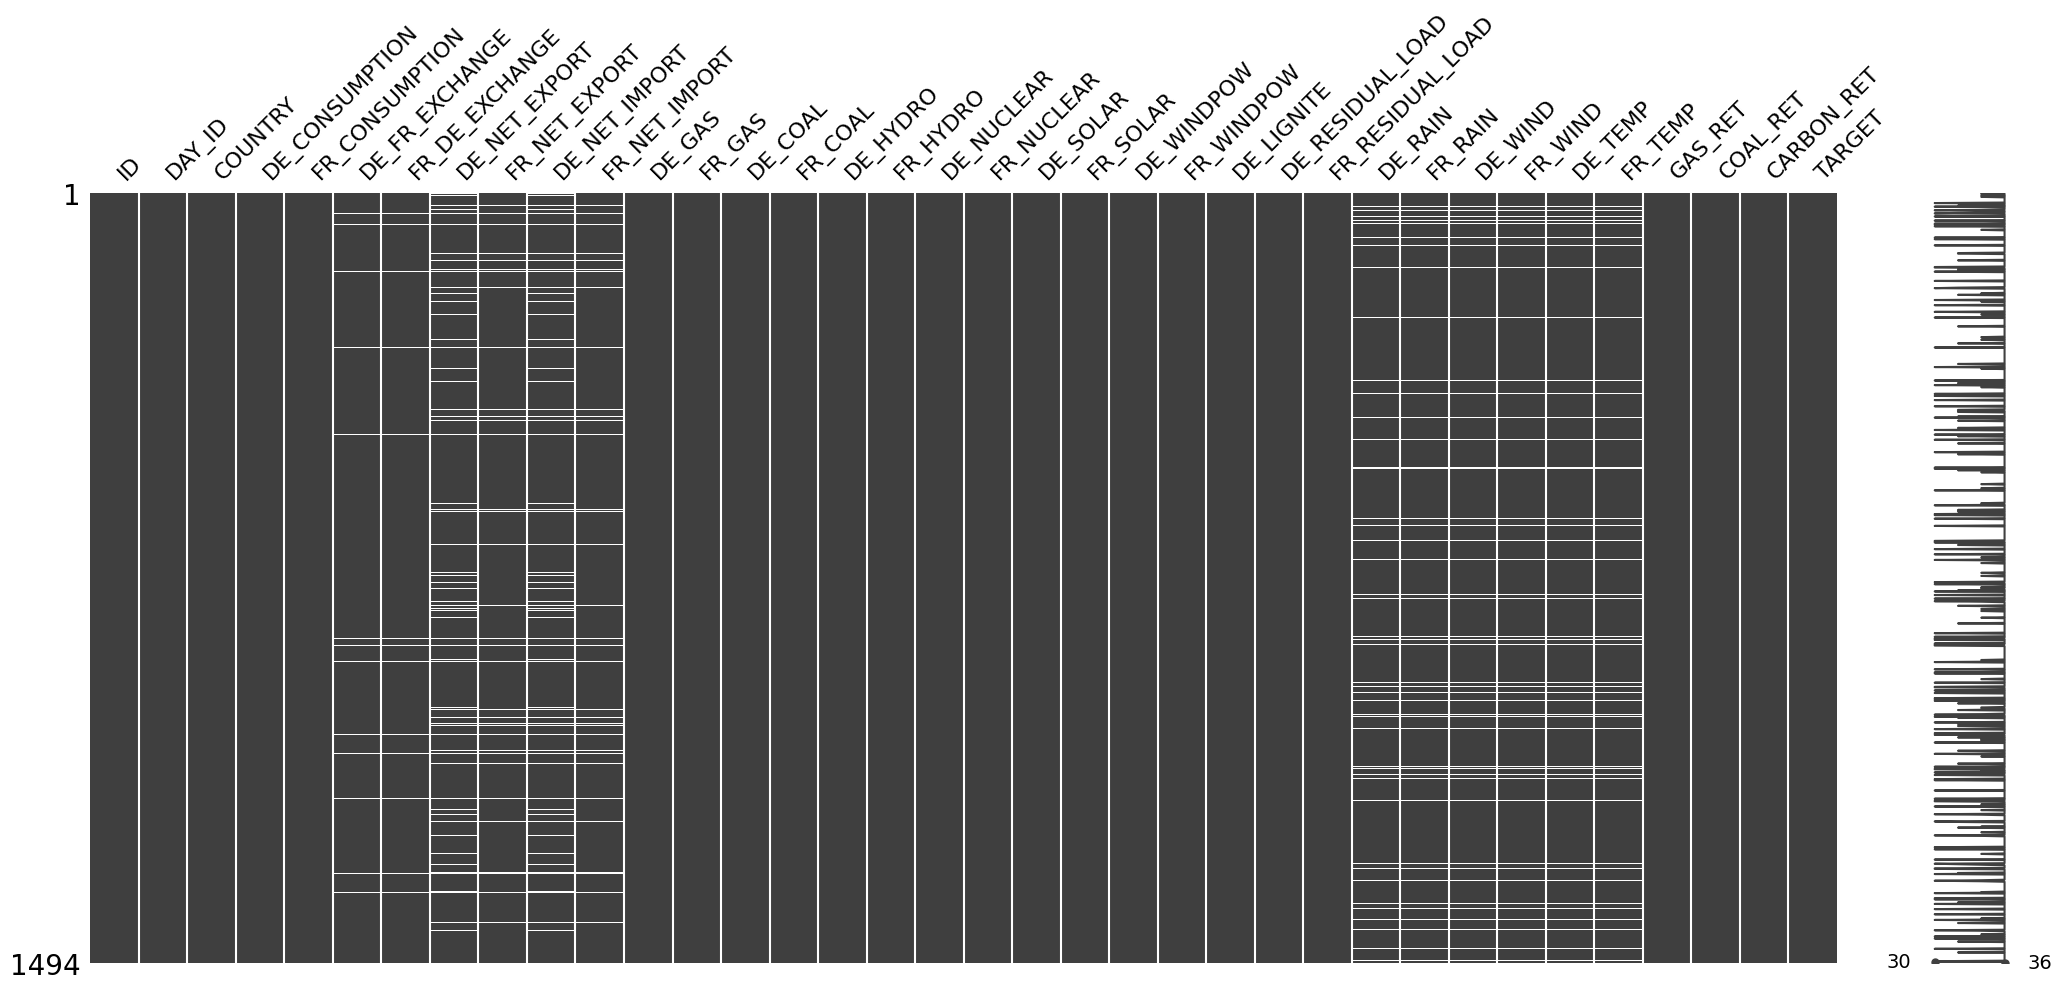

In [4]:
msno.matrix(df)

In [5]:
xtest = pd.read_csv('/content/ChallengeData_QubeRT/Datasets/Initial_Dataset/X_test_final.csv')

<Axes: >

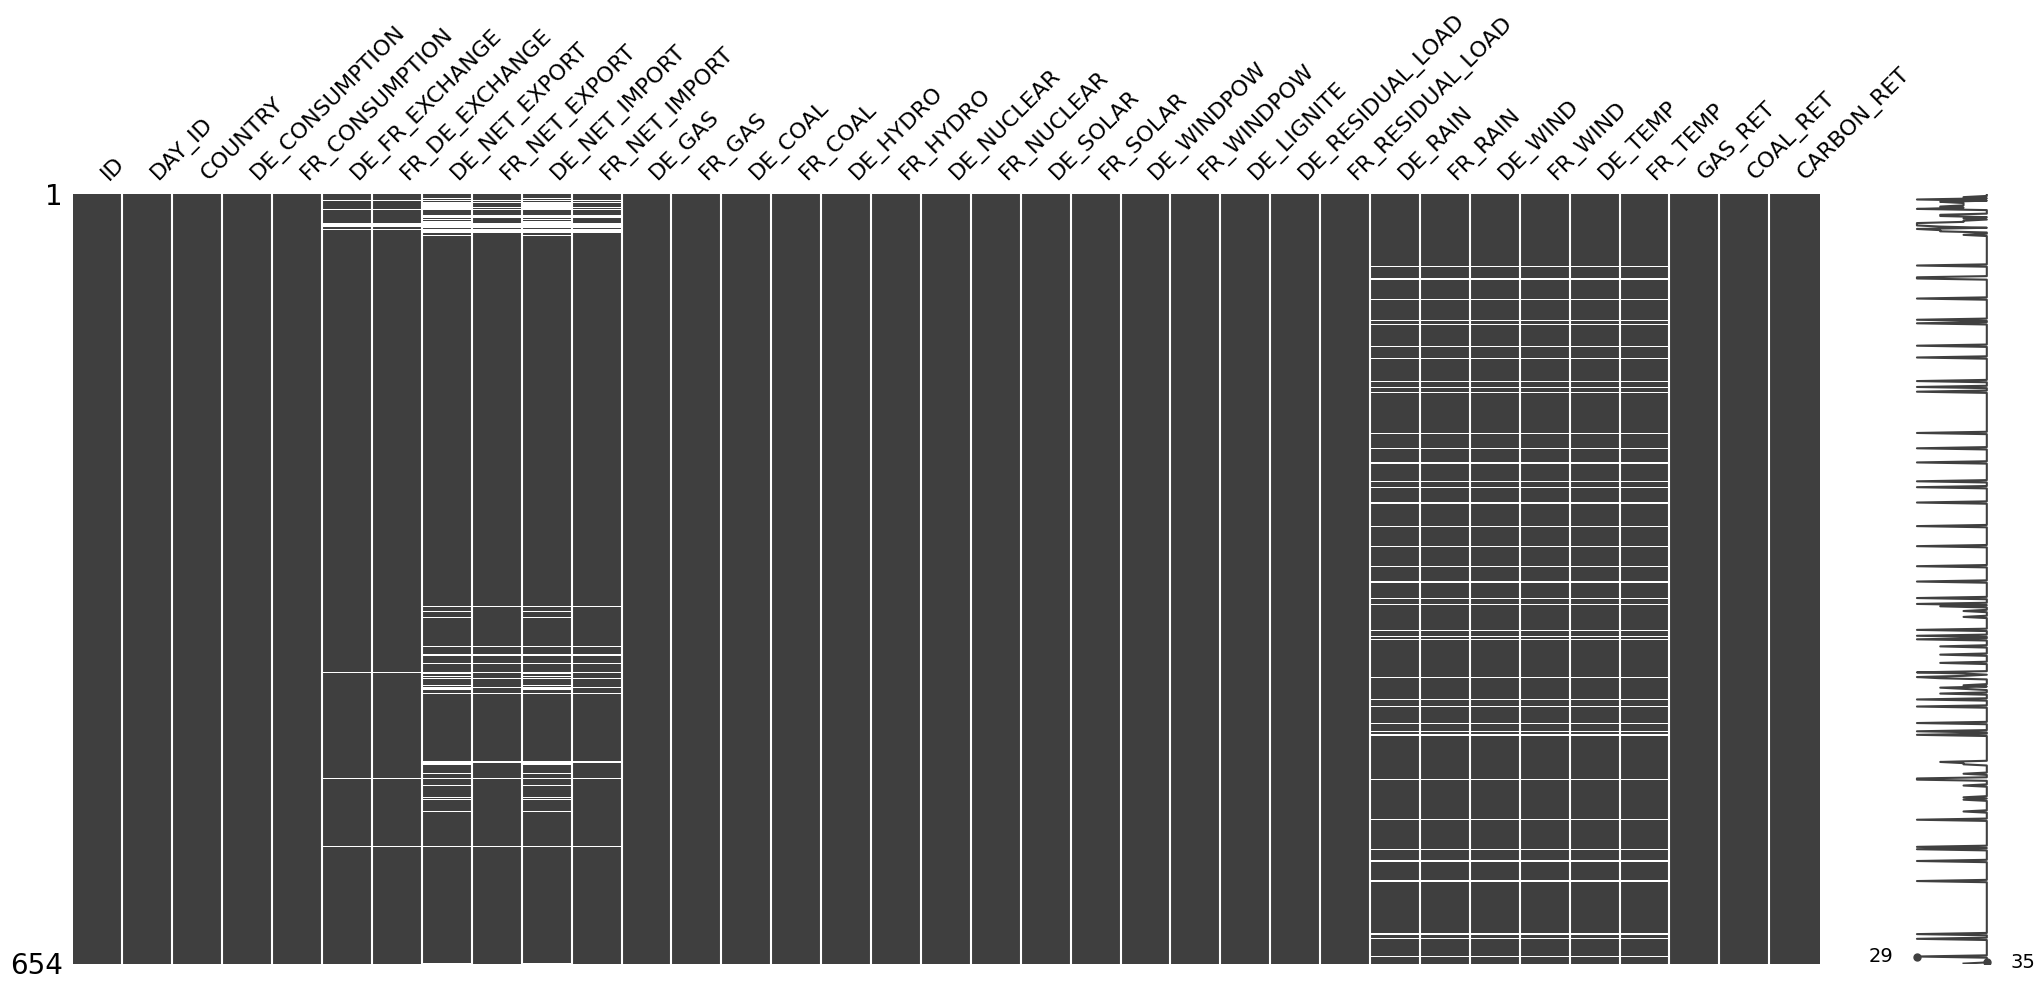

In [6]:
msno.matrix(xtest)

### Drop NaN in train and test

In [7]:
df = df.dropna(axis=1)


In [8]:
xtest = xtest.dropna(axis=1)

One hot encoding de Country

<Axes: >

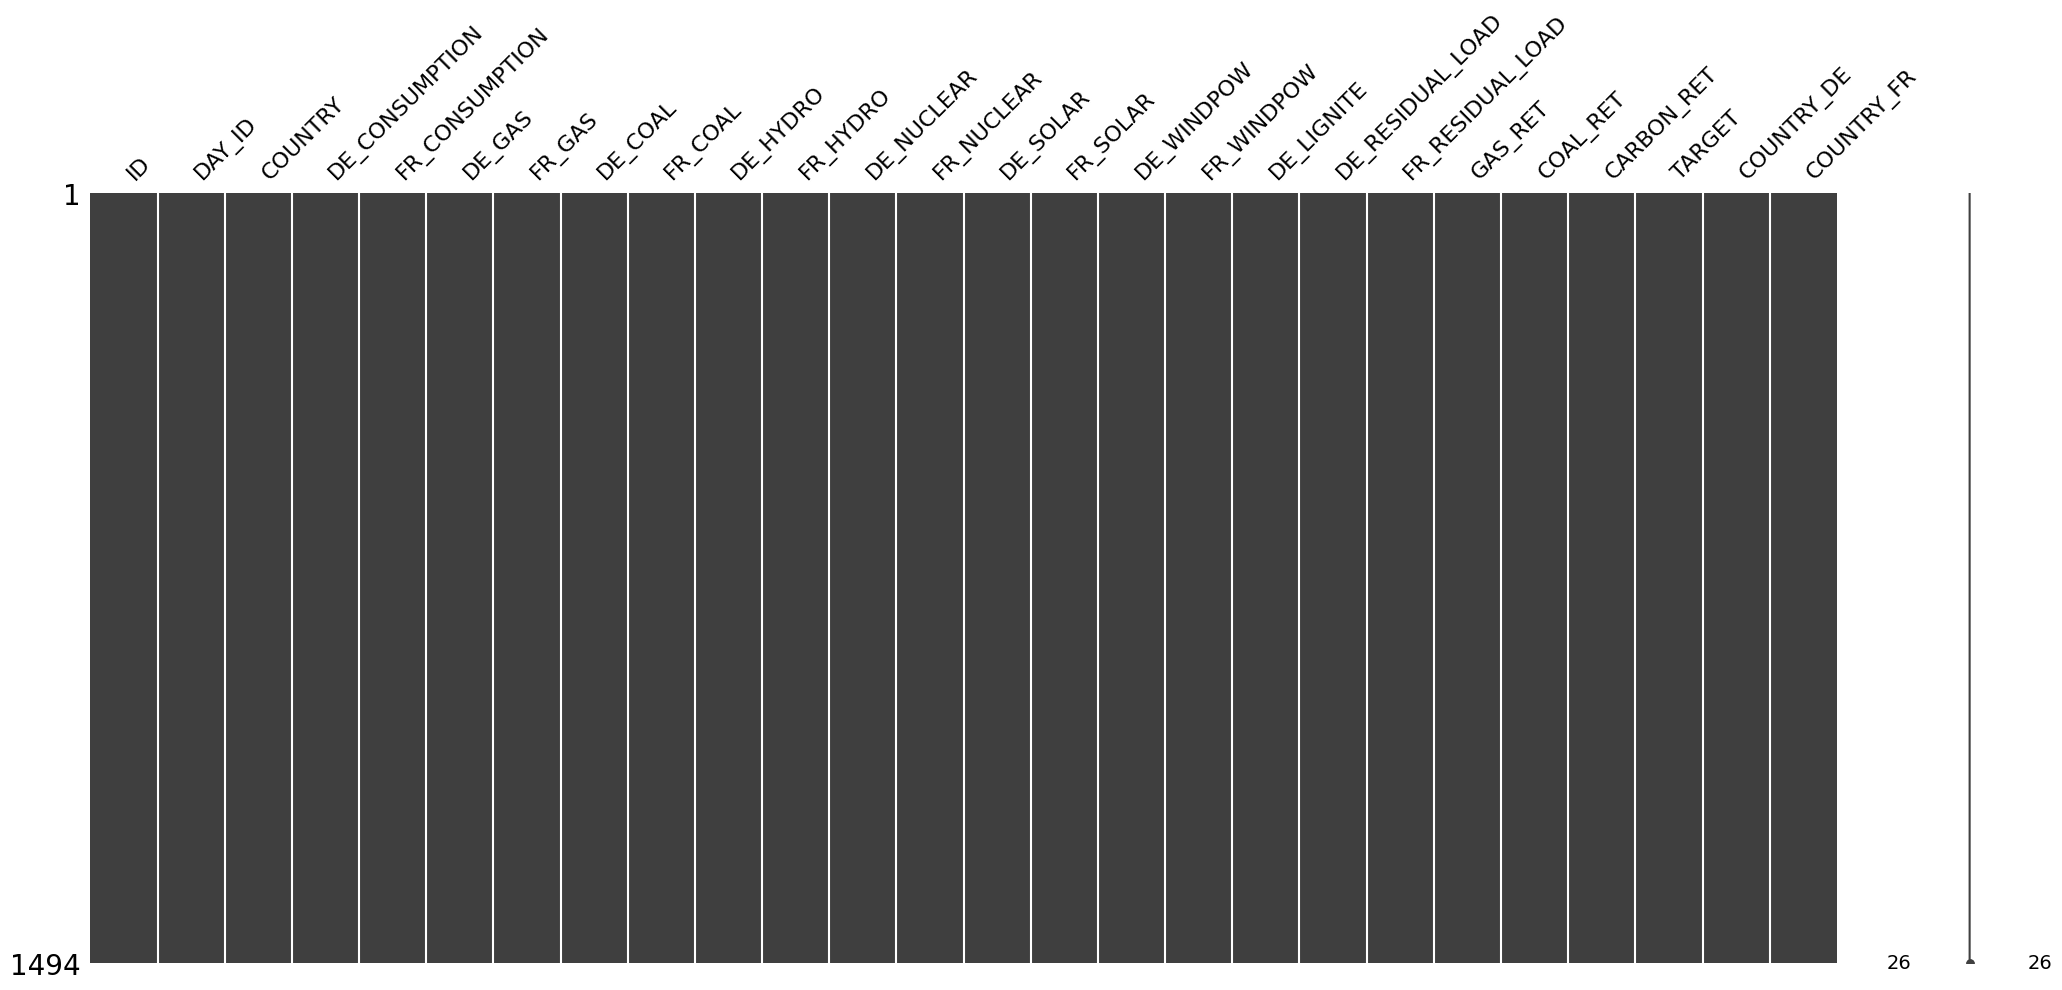

In [9]:
from pandas.core.describe import DataFrameDescriber

one_hot_encoded = pd.get_dummies(df['COUNTRY'])

one_hot_encoded = one_hot_encoded.add_prefix('COUNTRY_')

# Ajouter les colonnes encodées au DataFrame d'origine
df = pd.concat([df, one_hot_encoded], axis=1)
msno.matrix(df)

<Axes: >

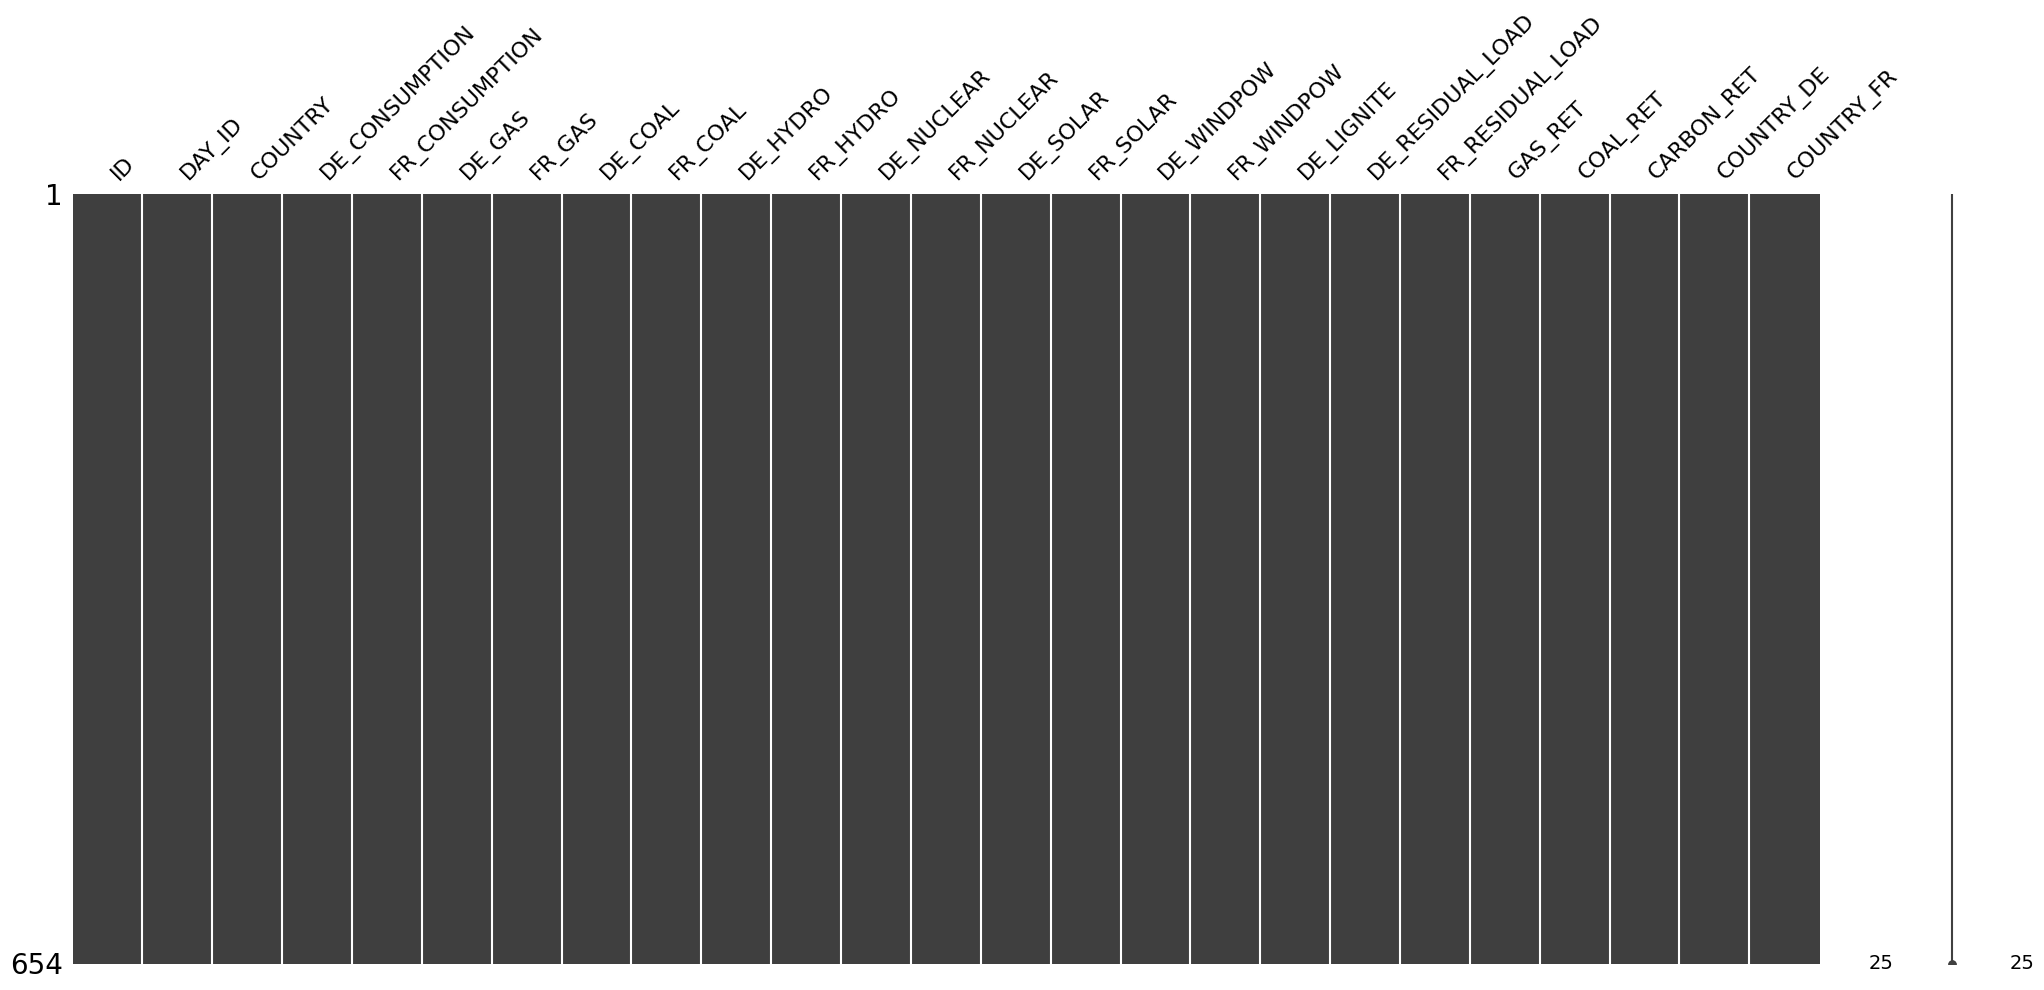

In [10]:

one_hot_encoded = pd.get_dummies(xtest['COUNTRY'])

one_hot_encoded = one_hot_encoded.add_prefix('COUNTRY_')

# Ajouter les colonnes encodées au DataFrame d'origine
xtest = pd.concat([xtest, one_hot_encoded], axis=1)

msno.matrix(xtest)

## *Models*

### Linear Regression

In [11]:
df.columns.to_list()

['ID',
 'DAY_ID',
 'COUNTRY',
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR']

In [12]:
corr_target = df[[
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR',]]
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                corr_target, target_feature='TARGET')

features_corr[:]

TARGET              1.00
DE_WINDPOW         -0.15
DE_RESIDUAL_LOAD    0.13
FR_WINDPOW         -0.13
DE_GAS              0.10
DE_HYDRO            0.09
DE_CONSUMPTION     -0.05
COUNTRY_DE          0.05
COUNTRY_FR         -0.05
FR_HYDRO            0.05
DE_COAL             0.05
GAS_RET             0.04
CARBON_RET          0.04
DE_LIGNITE          0.03
FR_RESIDUAL_LOAD    0.03
DE_SOLAR            0.02
FR_COAL             0.02
FR_GAS              0.02
FR_SOLAR            0.02
FR_CONSUMPTION     -0.01
DE_NUCLEAR          0.01
COAL_RET           -0.01
FR_NUCLEAR          0.00
Name: TARGET, dtype: float64

<ipython-input-13-e187e56439d8>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(15, 5))


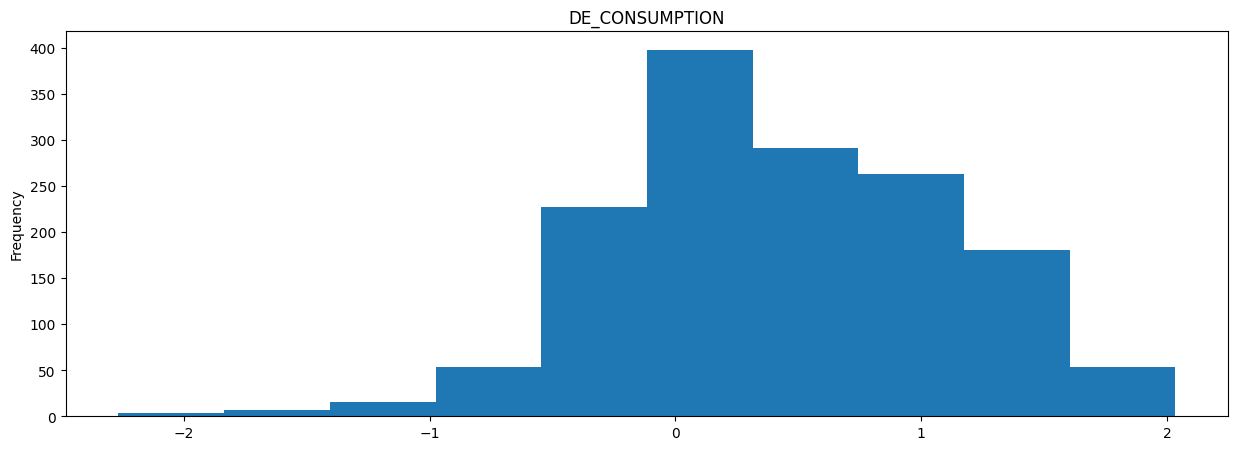

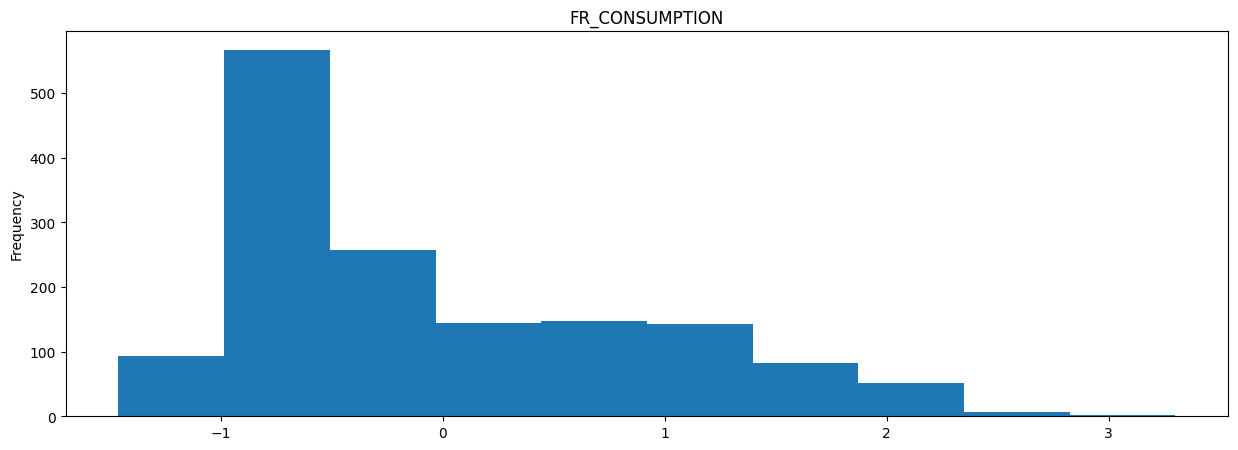

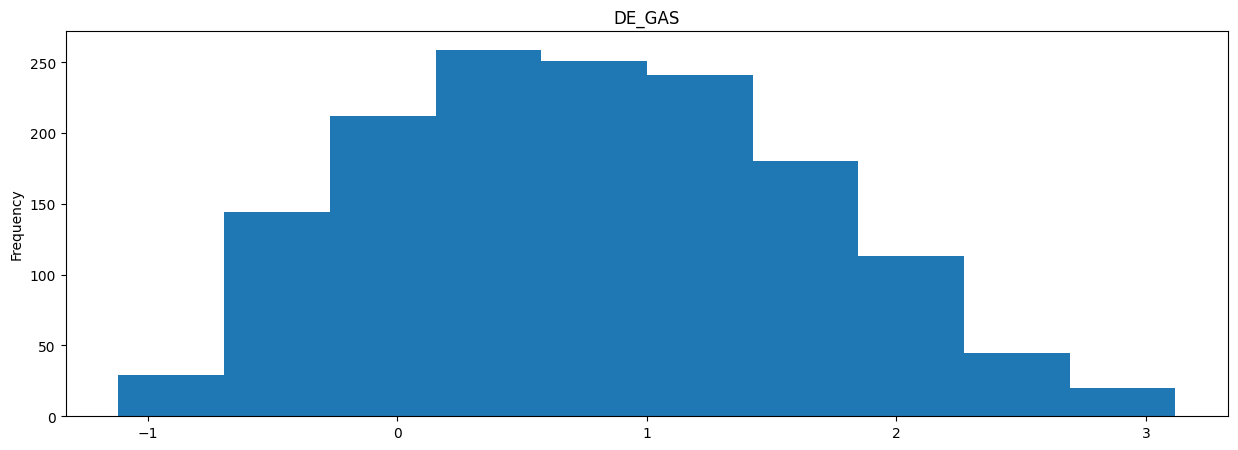

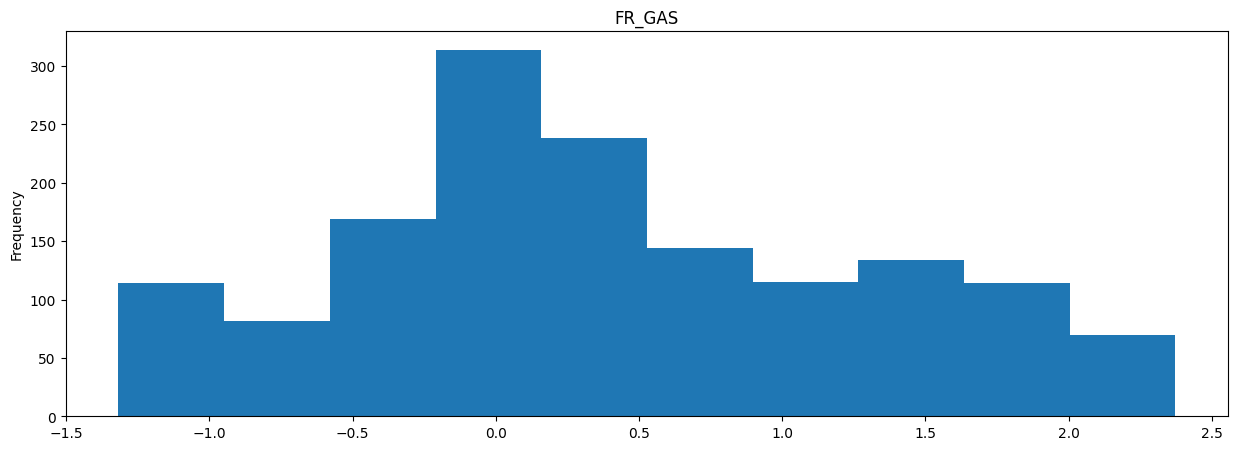

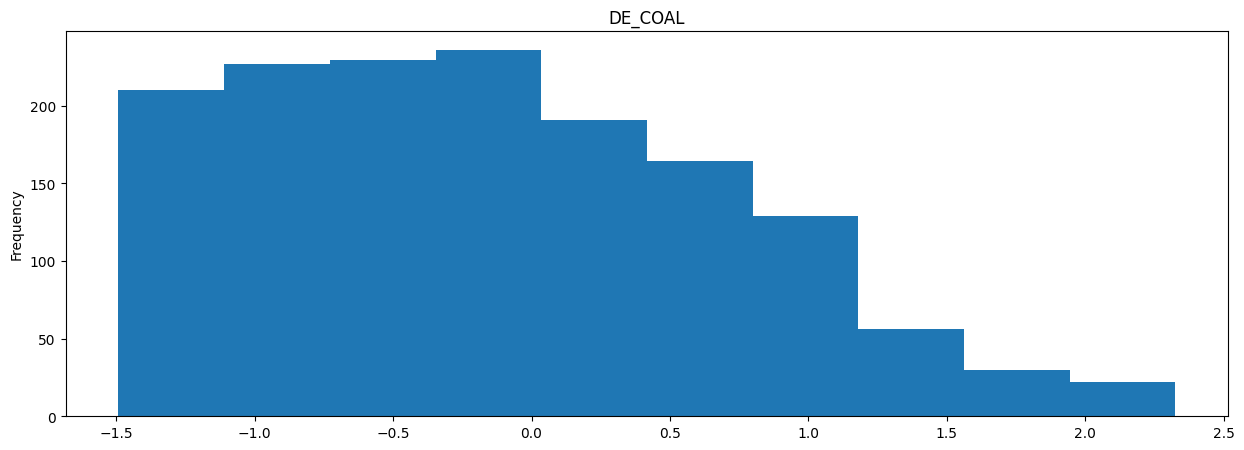

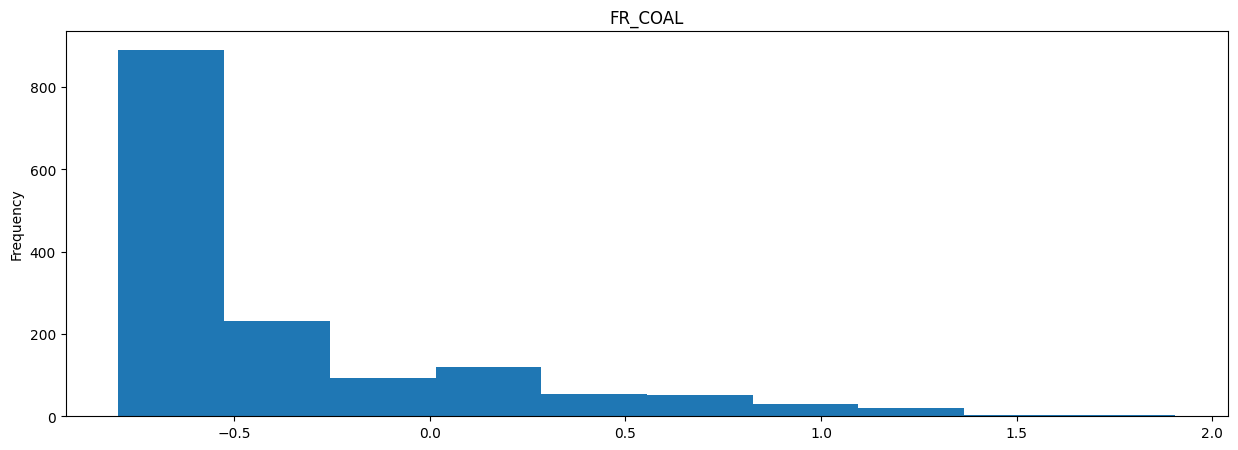

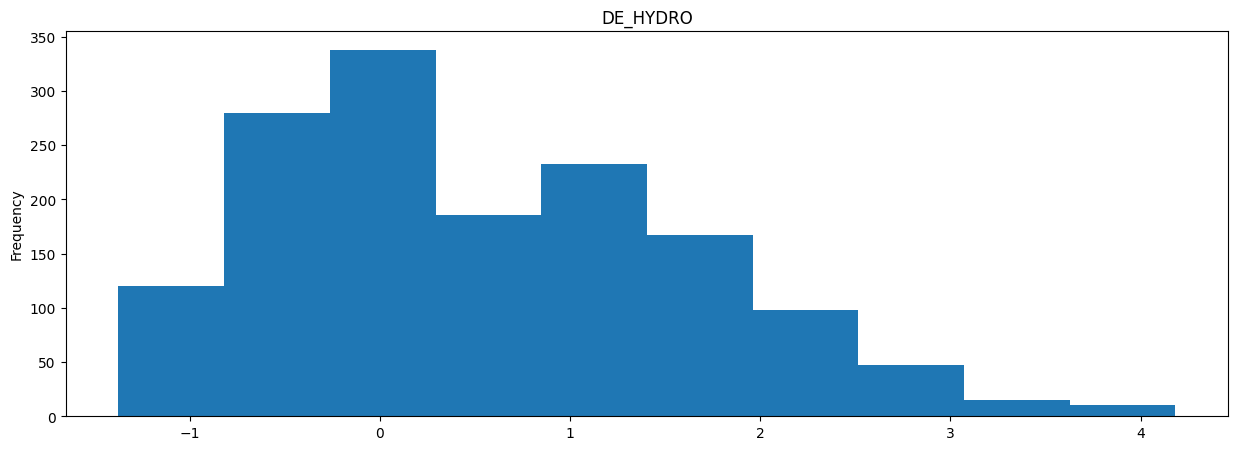

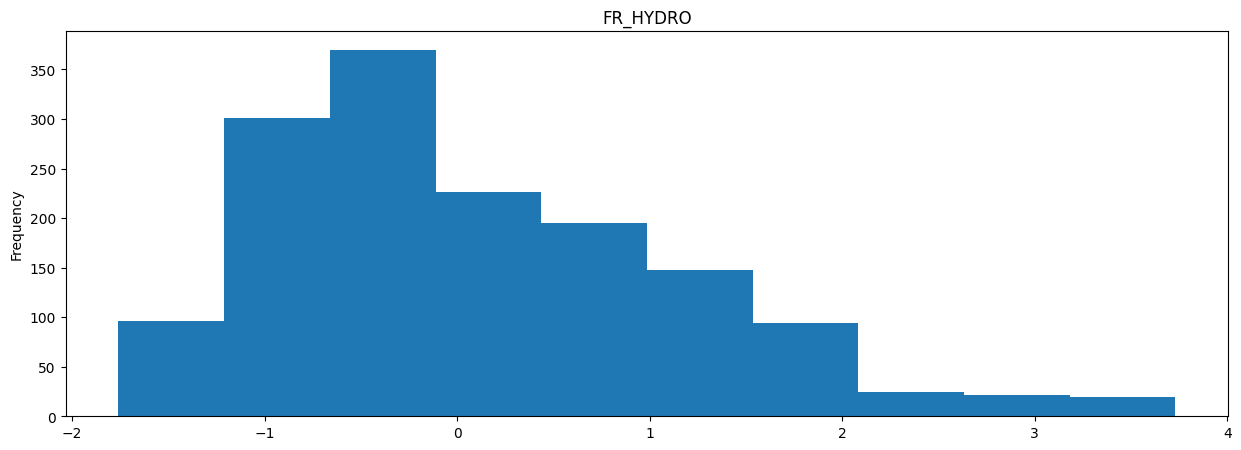

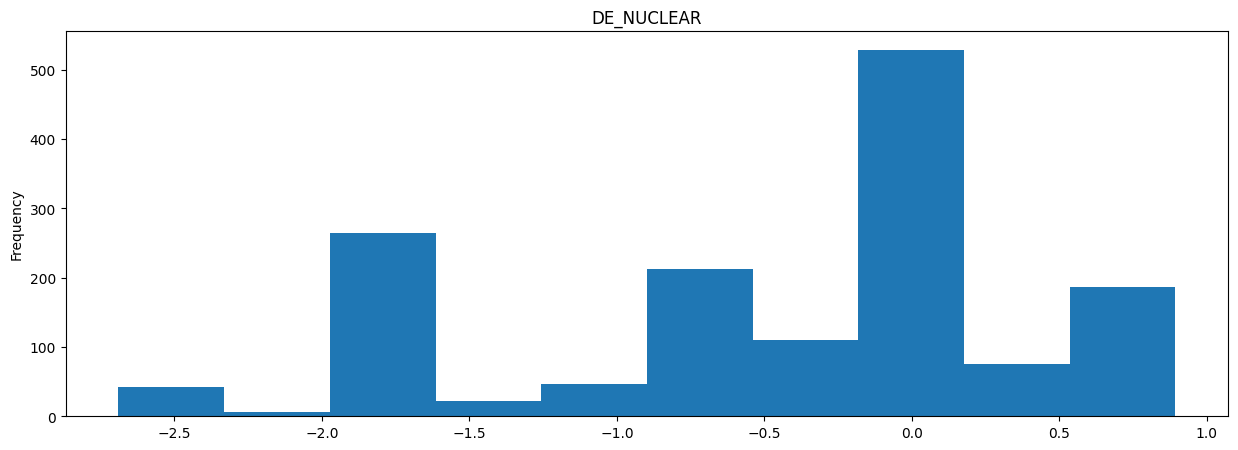

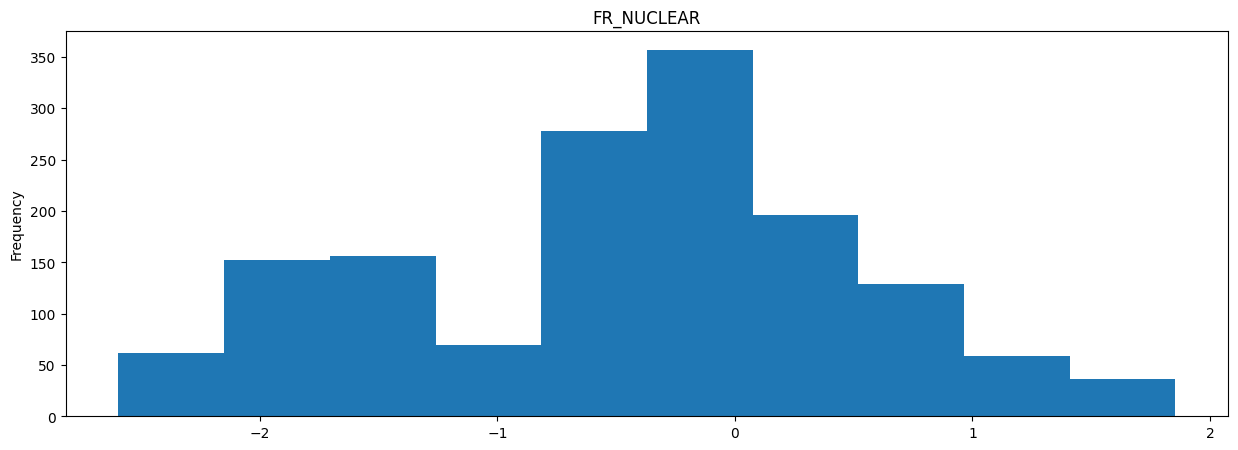

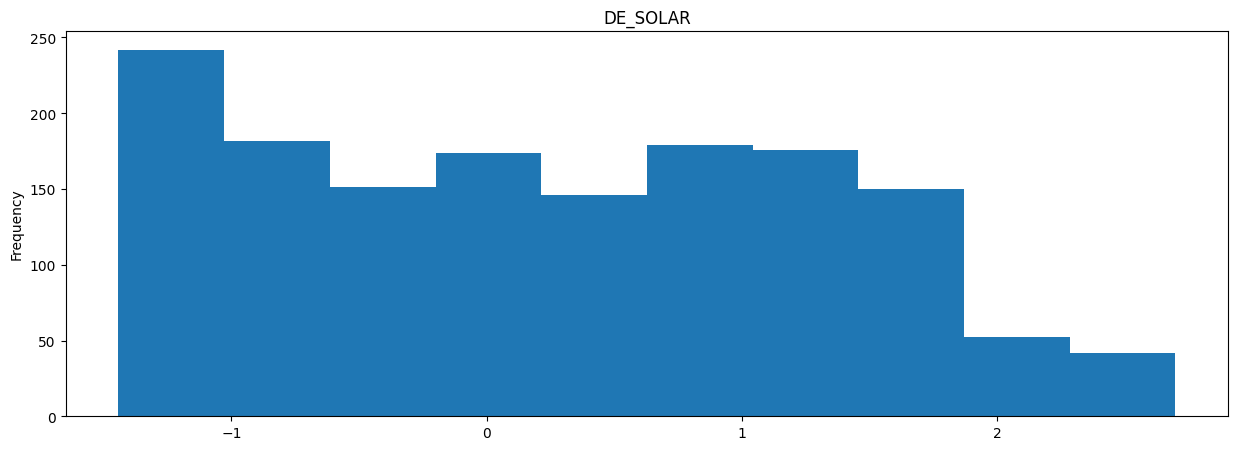

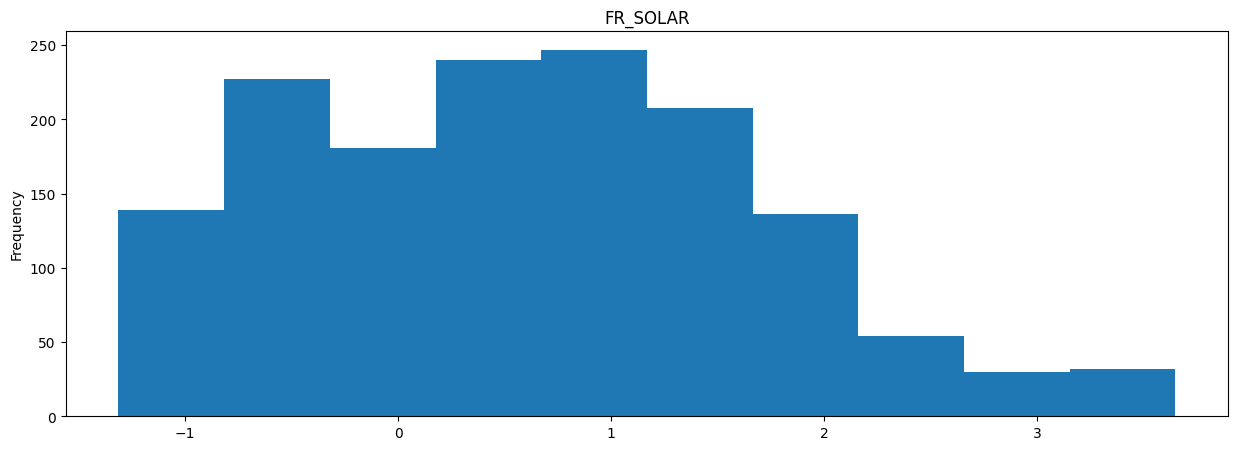

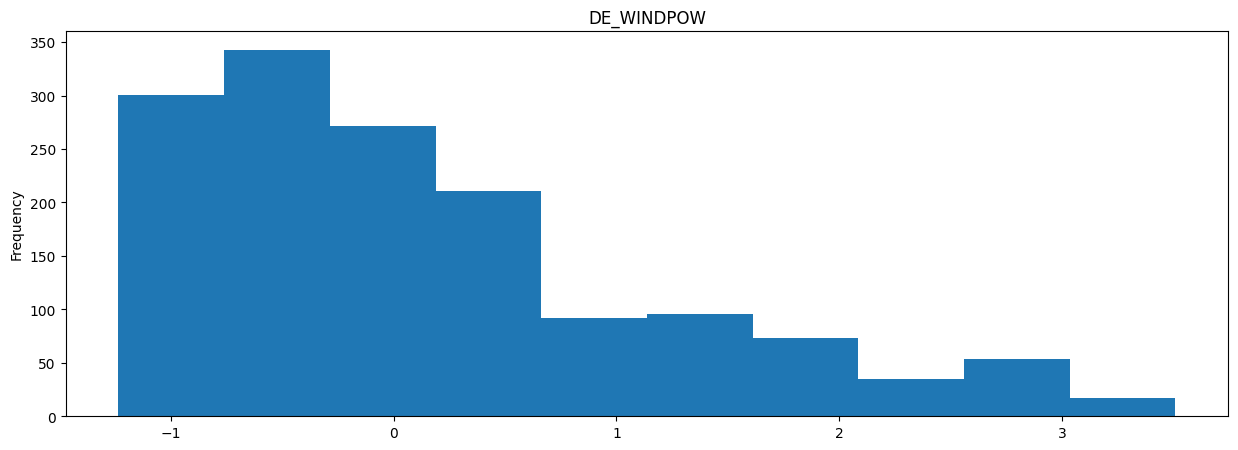

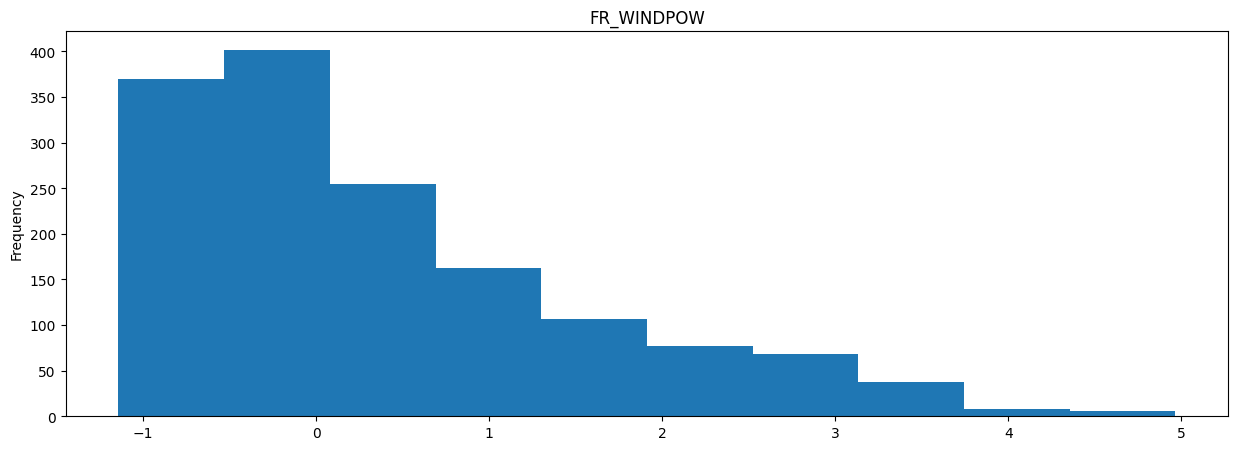

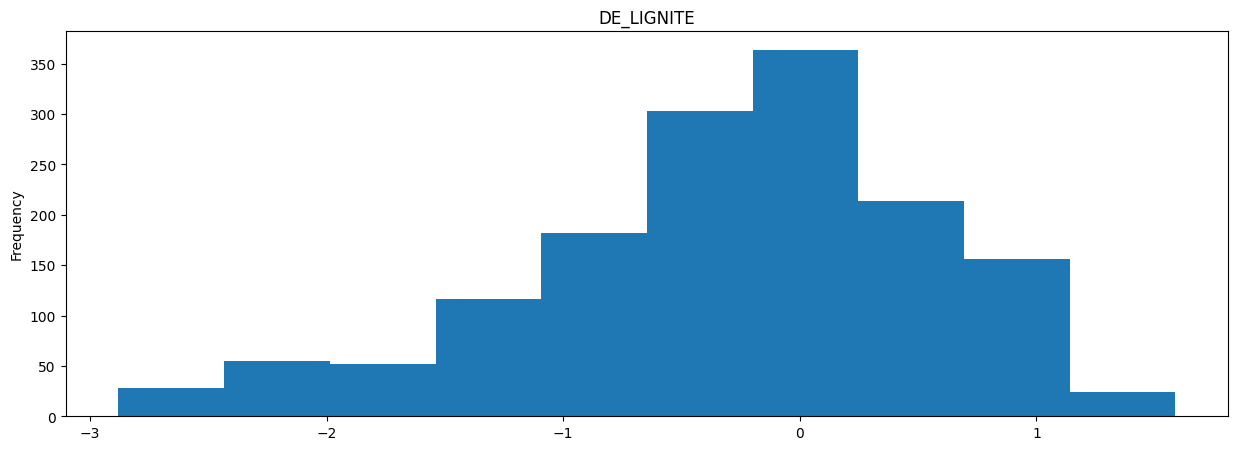

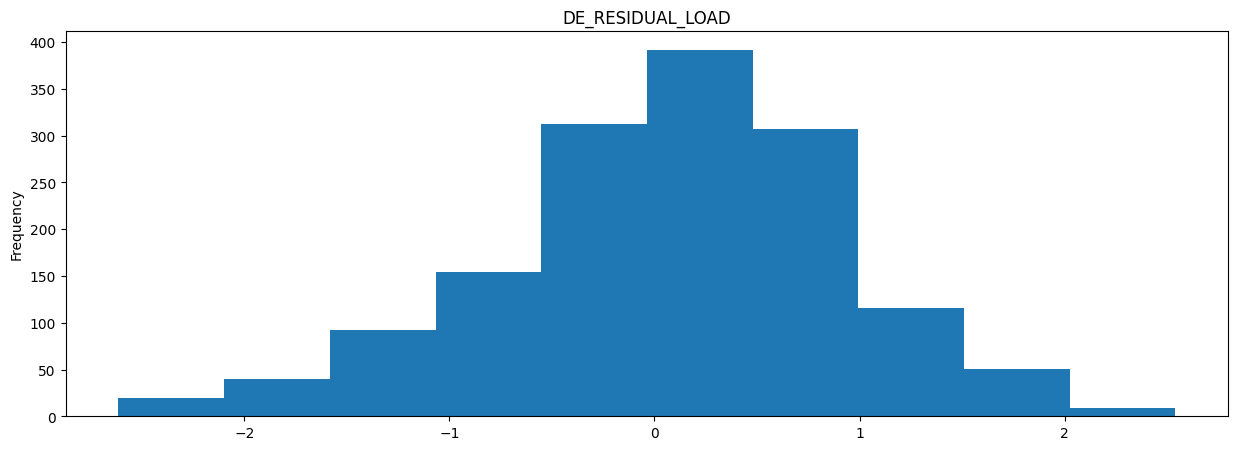

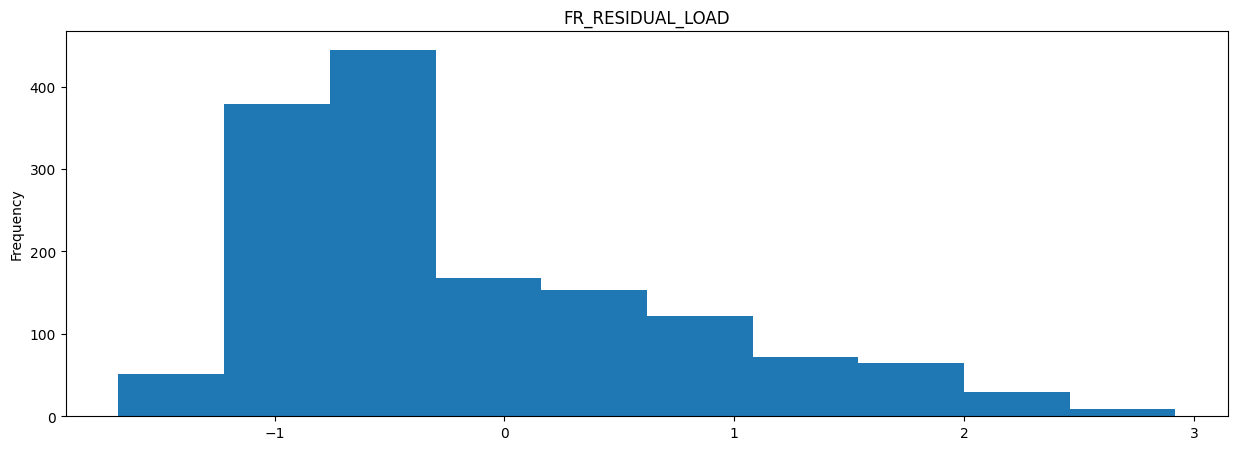

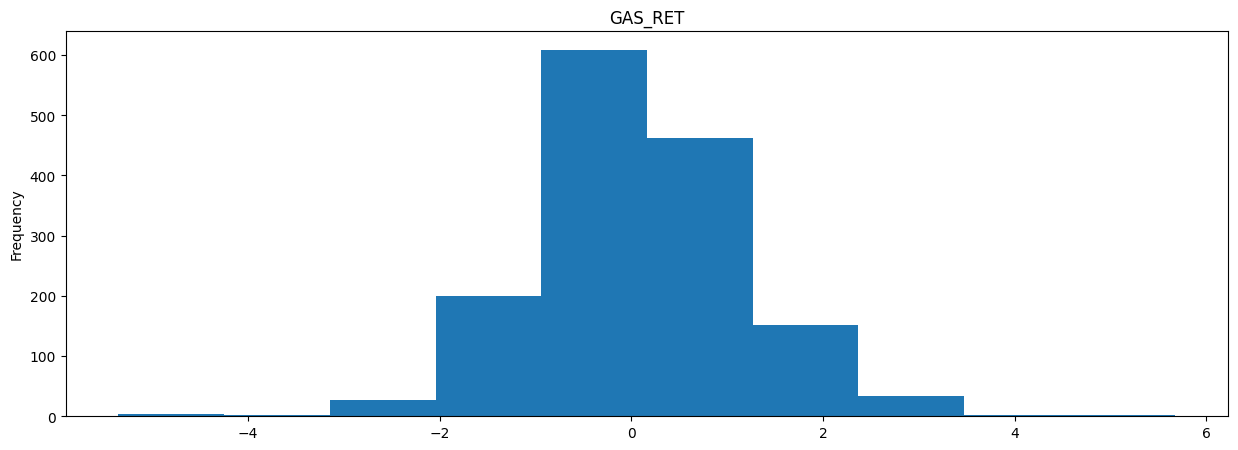

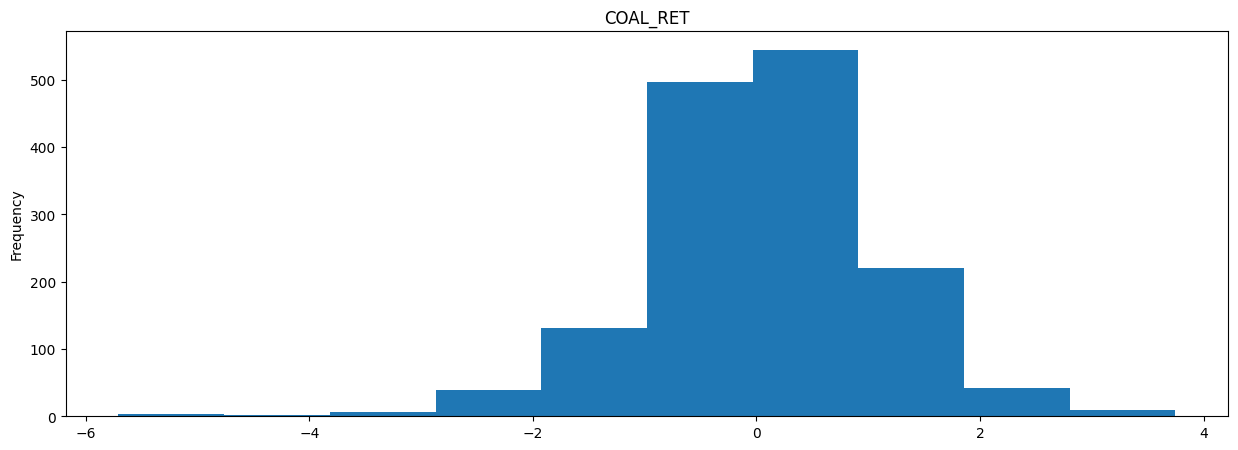

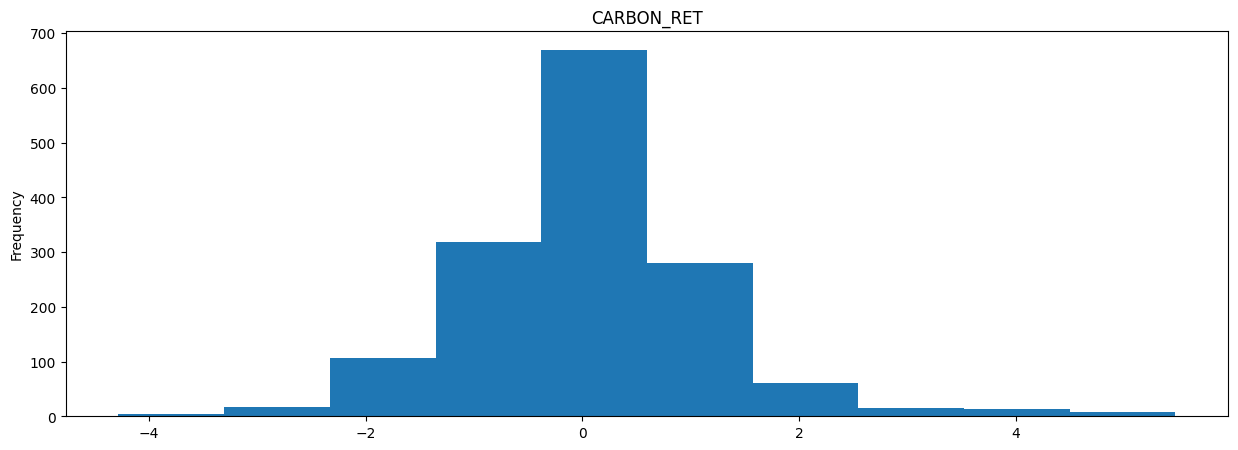

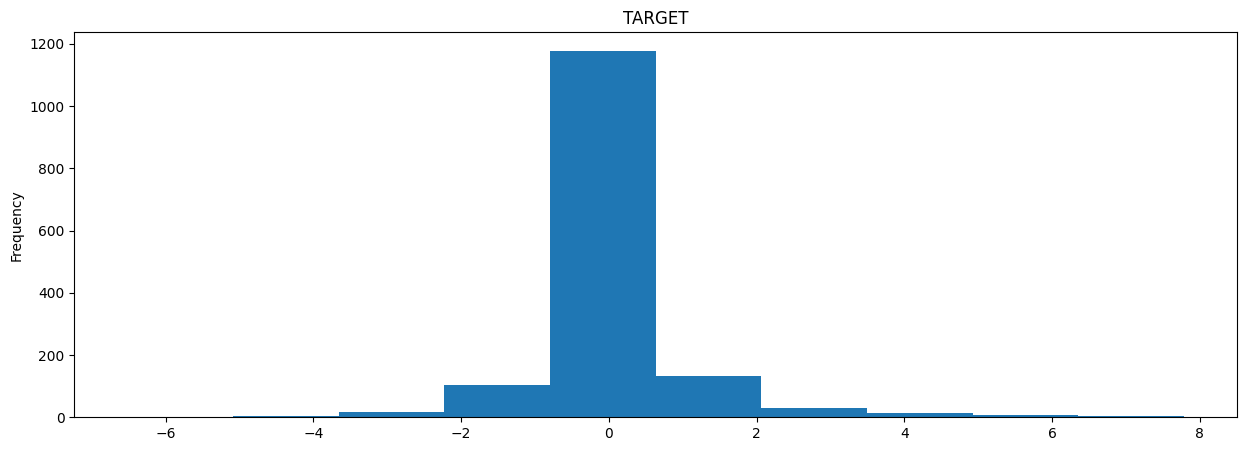

In [13]:
columns = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 'TARGET']

for feature in columns :
  fig, ax = plt.subplots(figsize=(15, 5))
  df[feature].plot(kind='hist', ax=ax)
  ax.set_title(feature)



### XGboost

In [14]:
#!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

# Liste des colonnes utilisées pour l'entraînement du modèle
features = [
    'DE_CONSUMPTION',
    'FR_CONSUMPTION',
    'DE_GAS',
    'FR_GAS',
    'DE_COAL',
    'FR_COAL',
    'DE_NUCLEAR',
    'FR_NUCLEAR',
    'DE_SOLAR',
    'FR_SOLAR',
    'DE_WINDPOW',
    'FR_WINDPOW',
    'DE_LIGNITE',
    'DE_RESIDUAL_LOAD',
    'FR_RESIDUAL_LOAD',

]

# Colonne cible à prédire
target_column = 'TARGET'

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    df[features],  # Utilisez uniquement les colonnes d'entités pour X
    df[target_column],  # Colonne cible pour y
    test_size=0.2,  # Proportion de données à utiliser pour le test (20% dans cet exemple)
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Instanciation du modèle XGBoost
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # L'objectif de régression pour les valeurs continues
    n_estimators=100,  # Nombre d'arbres à construire
    learning_rate=0.1,  # Taux d'apprentissage pour la mise à jour des poids
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Calcul du coefficient de corrélation de Spearman pour évaluer le modèle
correlation, _ = spearmanr(y_test, y_pred)
print(f"Correlation de Spearman : {correlation:.2f}")


Correlation de Spearman : 0.14


In [15]:
print(_)

0.01686188881081742


### Decision tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

# Liste des colonnes utilisées pour l'entraînement du modèle
features = [
    'DE_CONSUMPTION',
    'FR_CONSUMPTION',
    'DE_GAS',
    'FR_GAS',
    'DE_COAL',
    'FR_COAL',
    'DE_NUCLEAR',
    'FR_NUCLEAR',
    'DE_SOLAR',
    'FR_SOLAR',
    'DE_WINDPOW',
    'FR_WINDPOW',
    'DE_LIGNITE',
    'DE_RESIDUAL_LOAD',
    'FR_RESIDUAL_LOAD',

]

# Colonne cible à prédire
target_column = 'TARGET'

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    df[features],  # Utilisez uniquement les colonnes d'entités pour X
    df[target_column],  # Colonne cible pour y
    test_size=0.2,  # Proportion de données à utiliser pour le test (20% dans cet exemple)
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Instanciation du modèle DecisionTreeRegressor
model = DecisionTreeRegressor(
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Calcul du coefficient de corrélation de Spearman pour évaluer le modèle
correlation, _ = spearmanr(y_test, y_pred)
print(f"Correlation de Spearman : {correlation:.2f}")


Correlation de Spearman : 0.10


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

# Liste des colonnes utilisées pour l'entraînement du modèle
features = [
    'DE_CONSUMPTION',
    'FR_CONSUMPTION',
    'DE_GAS',
    'FR_GAS',
    'DE_COAL',
    'FR_COAL',
    'DE_NUCLEAR',
    'FR_NUCLEAR',
    'DE_SOLAR',
    'FR_SOLAR',
    'DE_WINDPOW',
  'FR_WINDPOW',
    'DE_LIGNITE',
    'DE_RESIDUAL_LOAD',
    'FR_RESIDUAL_LOAD',

]

# Colonne cible à prédire
target_column = 'TARGET'

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    df[features],  # Utilisez uniquement les colonnes d'entités pour X
    df[target_column],  # Colonne cible pour y
    test_size=0.2,  # Proportion de données à utiliser pour le test (20% dans cet exemple)
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Instanciation du modèle RandomForestRegressor avec peu d'arbres (par exemple, 10 arbres)
model = RandomForestRegressor(
    n_estimators=10,  # Nombre d'arbres à construire (vous pouvez ajuster ce nombre selon vos besoins)
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Calcul du coefficient de corrélation de Spearman pour évaluer le modèle
correlation, _ = spearmanr(y_test, y_pred)
print(f"Correlation de Spearman : {correlation:.2f}")


Correlation de Spearman : 0.14


## Drop rows with NaN
The goal is to assess the model performances when all features are known for one sample.  
If this model is relevant, we will try to predict the missing values thanks to different ML models, to complete the Dataset.

In [18]:

#dataset

df2 = pd.read_csv('/content/ChallengeData_QubeRT/Datasets/Initial_Dataset/X_train_NHkHMNU.csv')
Y2 = pd.read_csv('/content/ChallengeData_QubeRT/Datasets/Initial_Dataset/y_train_ZAN5mwg.csv', usecols = [1])

TARGET = Y
df2['TARGET'] = TARGET
df2.shape


(1494, 36)

In [19]:
one_hot_encoded = pd.get_dummies(df2['COUNTRY'])

one_hot_encoded = one_hot_encoded.add_prefix('COUNTRY_')

# Ajouter les colonnes encodées au DataFrame d'origine
df2 = pd.concat([df2, one_hot_encoded], axis=1)

In [20]:
# Suppression de toutes les lignes contenant des NaN
xtrain_cleaned = df2.dropna()

# Affichage des informations sur le DataFrame après la suppression des NaN
print("Avant la suppression des NaN :")
print(df2.shape)  # Affiche le nombre de lignes et de colonnes du DataFrame original

print("Après la suppression des NaN :")
print(xtrain_cleaned.shape)  # Affiche le nombre de lignes et de colonnes du DataFrame nettoyé


Avant la suppression des NaN :
(1494, 38)
Après la suppression des NaN :
(1276, 38)


In [21]:
columns_with_nan = df2.columns[df2.isnull().any()].tolist()

print(columns_with_nan)

['DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP']


In [22]:
columns_without_nan = xtrain_cleaned.columns[~xtrain_cleaned.isnull().any()].tolist()

print(columns_without_nan)

['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET', 'TARGET', 'COUNTRY_DE', 'COUNTRY_FR']


### XGBOOST without rows that have NaN

In [23]:
cols = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 'DE_FR_EXCHANGE',
 #'FR_DE_EXCHANGE',
 'DE_NET_EXPORT',
 'FR_NET_EXPORT',
 'DE_NET_IMPORT',
 'FR_NET_IMPORT',
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN',
 #'FR_RAIN',
 'DE_WIND',
 'FR_WIND',
 #'DE_TEMP',
 #'FR_TEMP',
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR'
 ]

In [24]:
from sklearn.model_selection import train_test_split

# Importer les classes nécessaires
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import spearmanr

# Séparation des features et de la variable cible ('DE_FR_EXCHANGE')
X = xtrain_cleaned[cols].drop(columns=['TARGET'])
y = xtrain_cleaned['TARGET']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet modèle Random Forest avec un nombre réduit d'arbres (par exemple, 100 arbres)
n_estimators = 200
model_rf = RandomForestRegressor(n_estimators=n_estimators,
                                 min_samples_split = 5,
                                 min_samples_leaf = 6,
                               #  max_features = 'sqrt',
                                 random_state=9)

# Entraîner le modèle sur les données d'entraînement
model_rf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model_rf.predict(X_test)

# Calculer le coefficient de corrélation de Spearman
spearman_corr, _ = spearmanr(y_test, y_pred)

print("Coefficient de corrélation de Spearman:", spearman_corr)


Coefficient de corrélation de Spearman: 0.3217963206683451


### Predicting missing values in DE_FR_Exchange

*   Élément de liste
*   Élément de liste



On retiendra
**DE_FR_EXCHANGE_model_xgboost** à partir des colonnes **cols_DE_FR_EXCHANGE**

In [25]:

cols_DE_FR_EXCHANGE = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 'DE_FR_EXCHANGE', #nan
 #'FR_DE_EXCHANGE', #nan
 #'DE_NET_EXPORT', #nan
 #'FR_NET_EXPORT', #nan
 #'DE_NET_IMPORT', #nan
 #'FR_NET_IMPORT', #nan
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN', #nan
 #'FR_RAIN', #nan
 #'DE_WIND', #nan
 #'FR_WIND', #nan
 #'DE_TEMP', #nan
 #'FR_TEMP', #nan
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 #'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR'
 ]

features_corr = \
        feature_engineering.get_features_correlated_to_target(
                xtrain_cleaned[cols_DE_FR_EXCHANGE], target_feature='DE_FR_EXCHANGE')

features_corr[:]

DE_FR_EXCHANGE      1.00
FR_CONSUMPTION      0.51
FR_RESIDUAL_LOAD    0.50
FR_GAS              0.48
DE_CONSUMPTION      0.46
DE_COAL             0.45
FR_COAL             0.41
DE_WINDPOW          0.40
DE_HYDRO           -0.38
DE_LIGNITE          0.27
DE_SOLAR           -0.27
FR_SOLAR           -0.17
DE_NUCLEAR         -0.14
DE_RESIDUAL_LOAD   -0.13
FR_WINDPOW          0.09
COAL_RET           -0.05
COUNTRY_DE         -0.04
COUNTRY_FR          0.04
FR_NUCLEAR          0.02
GAS_RET            -0.02
FR_HYDRO           -0.01
DE_GAS              0.01
CARBON_RET         -0.01
Name: DE_FR_EXCHANGE, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Séparation des features et de la variable cible ('DE_FR_EXCHANGE')
X = xtrain_cleaned[cols_DE_FR_EXCHANGE].drop(columns=['DE_FR_EXCHANGE'])
y = xtrain_cleaned['DE_FR_EXCHANGE']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

# Instancier le modèle de régression linéaire
DE_FR_EXCHANGE_linear_model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
DE_FR_EXCHANGE_linear_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = DE_FR_EXCHANGE_linear_model.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)


Mean Squared Error (MSE): 0.1808750401612929
Coefficient of Determination (R-squared): 0.8162064163963163


In [27]:
from xgboost import XGBRegressor

DE_FR_EXCHANGE_model_xgboost = XGBRegressor(
    objective='reg:squarederror',  # L'objectif de régression pour les valeurs continues
    random_state=5  # Pour assurer la reproductibilité des résultats
)

# Entraîner le modèle sur les données d'entraînement
DE_FR_EXCHANGE_model_xgboost.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = DE_FR_EXCHANGE_model_xgboost.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 0.07755897047058508
Coefficient of Determination (R-squared): 0.9211895620828083


### Predicting missing values in FR_DE_EXCHANGE

FR_DE_EXCHANGE = -1 * DE_FR_EXCHANGE

In [28]:
xtrain_cleaned[['FR_DE_EXCHANGE','DE_FR_EXCHANGE']].head()

,FR_DE_EXCHANGE,DE_FR_EXCHANGE
1,0.022063,-0.022063
2,-1.021305,1.021305
3,0.839586,-0.839586
5,0.717490,-0.717490
6,-0.399588,0.399588


### Predicting missing values in DE_NET_EXPORT

In [29]:

cols_DE_NET_EXPORT = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 #'DE_FR_EXCHANGE', #nan
 #'FR_DE_EXCHANGE', #nan
 'DE_NET_EXPORT', #nan
 #'FR_NET_EXPORT', #nan
 #'DE_NET_IMPORT', #nan
 #'FR_NET_IMPORT', #nan
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN', #nan
 #'FR_RAIN', #nan
 #'DE_WIND', #nan
 #'FR_WIND', #nan
 #'DE_TEMP', #nan
 #'FR_TEMP', #nan
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 #'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR'
 ]

features_corr = \
        feature_engineering.get_features_correlated_to_target(
                xtrain_cleaned[cols_DE_NET_EXPORT], target_feature='DE_NET_EXPORT')

features_corr[:]

DE_NET_EXPORT       1.00
DE_WINDPOW          0.76
FR_CONSUMPTION      0.57
DE_CONSUMPTION      0.56
FR_RESIDUAL_LOAD    0.49
DE_HYDRO           -0.48
DE_SOLAR           -0.47
FR_SOLAR           -0.45
FR_WINDPOW          0.41
DE_RESIDUAL_LOAD   -0.41
FR_GAS              0.36
FR_NUCLEAR          0.35
FR_COAL             0.30
DE_GAS             -0.22
DE_COAL             0.18
DE_NUCLEAR          0.16
DE_LIGNITE          0.08
CARBON_RET         -0.08
COUNTRY_DE         -0.08
COUNTRY_FR          0.08
GAS_RET            -0.07
FR_HYDRO            0.06
COAL_RET           -0.02
Name: DE_NET_EXPORT, dtype: float64

In [30]:
# Séparation des features et de la variable cible ('DE_FR_EXCHANGE')
X = xtrain_cleaned[cols_DE_NET_EXPORT].drop(columns=['DE_NET_EXPORT'])
y = xtrain_cleaned['DE_NET_EXPORT']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [31]:
from xgboost import XGBRegressor

DE_NET_EXPORT_model_xgboost = XGBRegressor(
    objective='reg:squarederror',  # L'objectif de régression pour les valeurs continues
    random_state=2  # Pour assurer la reproductibilité des résultats
)

# Entraîner le modèle sur les données d'entraînement
DE_NET_EXPORT_model_xgboost.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = DE_NET_EXPORT_model_xgboost.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 0.040455453813135436
Coefficient of Determination (R-squared): 0.9570017314880777


### Predicting missing values in FR_NET_EXPORT

In [32]:
#### FR_NET_EXPORT


cols_FR_NET_EXPORT = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 #'DE_FR_EXCHANGE', #nan
 #'FR_DE_EXCHANGE', #nan
 #'DE_NET_EXPORT', #nan
 'FR_NET_EXPORT', #nan
 #'DE_NET_IMPORT', #nan
 #'FR_NET_IMPORT', #nan
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN', #nan
 #'FR_RAIN', #nan
 #'DE_WIND', #nan
 #'FR_WIND', #nan
 #'DE_TEMP', #nan
 #'FR_TEMP', #nan
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 #'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR'
 ]

features_corr = \
        feature_engineering.get_features_correlated_to_target(
                xtrain_cleaned[cols_FR_NET_EXPORT], target_feature='FR_NET_EXPORT')

features_corr[:]

FR_NET_EXPORT       1.00
FR_NUCLEAR          0.49
DE_NUCLEAR          0.47
FR_GAS             -0.47
DE_COAL            -0.44
DE_LIGNITE         -0.34
FR_COAL            -0.29
DE_GAS             -0.26
FR_RESIDUAL_LOAD   -0.25
FR_CONSUMPTION     -0.22
DE_HYDRO            0.17
FR_WINDPOW          0.15
DE_CONSUMPTION     -0.14
FR_HYDRO            0.14
FR_SOLAR           -0.12
DE_RESIDUAL_LOAD   -0.09
CARBON_RET         -0.03
GAS_RET             0.03
COUNTRY_DE         -0.02
COUNTRY_FR          0.02
COAL_RET            0.01
DE_WINDPOW          0.01
DE_SOLAR            0.01
Name: FR_NET_EXPORT, dtype: float64

In [33]:
# Séparation des features et de la variable cible ('DE_FR_EXCHANGE')
X = xtrain_cleaned[cols_FR_NET_EXPORT].drop(columns=['FR_NET_EXPORT'])
y = xtrain_cleaned['FR_NET_EXPORT']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


FR_NET_EXPORT_model_xgboost = XGBRegressor(
    objective='reg:squarederror',  # L'objectif de régression pour les valeurs continues
    random_state=2  # Pour assurer la reproductibilité des résultats
)

# Entraîner le modèle sur les données d'entraînement
FR_NET_EXPORT_model_xgboost.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = FR_NET_EXPORT_model_xgboost.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)


Mean Squared Error (MSE): 0.03209325435613934
Coefficient of Determination (R-squared): 0.972714182644355


### Predicting missing values in DE_NET_IMPORT

In [34]:

cols_DE_NET_IMPORT = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 #'DE_FR_EXCHANGE', #nan
 #'FR_DE_EXCHANGE', #nan
 #'DE_NET_EXPORT', #nan
 #'FR_NET_EXPORT', #nan
 'DE_NET_IMPORT', #nan
 #'FR_NET_IMPORT', #nan
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN', #nan
 #'FR_RAIN', #nan
 #'DE_WIND', #nan
 #'FR_WIND', #nan
 #'DE_TEMP', #nan
 #'FR_TEMP', #nan
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 #'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR'
 ]

features_corr = \
        feature_engineering.get_features_correlated_to_target(
                xtrain_cleaned[cols_DE_NET_IMPORT], target_feature='DE_NET_IMPORT')

features_corr[:]

DE_NET_IMPORT       1.00
DE_WINDPOW         -0.76
FR_CONSUMPTION     -0.57
DE_CONSUMPTION     -0.56
FR_RESIDUAL_LOAD   -0.49
DE_HYDRO            0.48
DE_SOLAR            0.47
FR_SOLAR            0.45
FR_WINDPOW         -0.41
DE_RESIDUAL_LOAD    0.41
FR_GAS             -0.36
FR_NUCLEAR         -0.35
FR_COAL            -0.30
DE_GAS              0.22
DE_COAL            -0.18
DE_NUCLEAR         -0.16
DE_LIGNITE         -0.08
CARBON_RET          0.08
COUNTRY_DE          0.08
COUNTRY_FR         -0.08
GAS_RET             0.07
FR_HYDRO           -0.06
COAL_RET            0.02
Name: DE_NET_IMPORT, dtype: float64

In [35]:
# Séparation des features et de la variable cible ('DE_FR_EXCHANGE')
X = xtrain_cleaned[cols_DE_NET_IMPORT].drop(columns=['DE_NET_IMPORT'])
y = xtrain_cleaned['DE_NET_IMPORT']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


DE_NET_IMPORT_model_xgboost = XGBRegressor(
    objective='reg:squarederror',  # L'objectif de régression pour les valeurs continues
    random_state=44  # Pour assurer la reproductibilité des résultats
)

# Entraîner le modèle sur les données d'entraînement
DE_NET_IMPORT_model_xgboost.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = DE_NET_IMPORT_model_xgboost.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)


Mean Squared Error (MSE): 0.040455453813135436
Coefficient of Determination (R-squared): 0.9570017314880777


### Predicting missing values in FR_NET_IMPORT

In [36]:

cols_FR_NET_IMPORT = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 #'DE_FR_EXCHANGE', #nan
 #'FR_DE_EXCHANGE', #nan
 #'DE_NET_EXPORT', #nan
 #'FR_NET_EXPORT', #nan
 #'DE_NET_IMPORT', #nan
 'FR_NET_IMPORT', #nan
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN', #nan
 #'FR_RAIN', #nan
 #'DE_WIND', #nan
 #'FR_WIND', #nan
 #'DE_TEMP', #nan
 #'FR_TEMP', #nan
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 #'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR'
 ]

features_corr = \
        feature_engineering.get_features_correlated_to_target(
                xtrain_cleaned[cols_FR_NET_IMPORT], target_feature='FR_NET_IMPORT')

features_corr[:]

FR_NET_IMPORT       1.00
FR_NUCLEAR         -0.49
DE_NUCLEAR         -0.47
FR_GAS              0.47
DE_COAL             0.44
DE_LIGNITE          0.34
FR_COAL             0.29
DE_GAS              0.26
FR_RESIDUAL_LOAD    0.25
FR_CONSUMPTION      0.22
DE_HYDRO           -0.17
FR_WINDPOW         -0.15
DE_CONSUMPTION      0.14
FR_HYDRO           -0.14
FR_SOLAR            0.12
DE_RESIDUAL_LOAD    0.09
CARBON_RET          0.03
GAS_RET            -0.03
COUNTRY_DE          0.02
COUNTRY_FR         -0.02
COAL_RET           -0.01
DE_WINDPOW         -0.01
DE_SOLAR           -0.01
Name: FR_NET_IMPORT, dtype: float64

In [37]:
# Séparation des features et de la variable cible ('DE_FR_EXCHANGE')
X = xtrain_cleaned[cols_FR_NET_IMPORT].drop(columns=['FR_NET_IMPORT'])
y = xtrain_cleaned['FR_NET_IMPORT']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


FR_NET_IMPORT_model_xgboost = XGBRegressor(
    objective='reg:squarederror',  # L'objectif de régression pour les valeurs continues
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Entraîner le modèle sur les données d'entraînement
FR_NET_IMPORT_model_xgboost.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = FR_NET_IMPORT_model_xgboost.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)


Mean Squared Error (MSE): 0.03209325435613934
Coefficient of Determination (R-squared): 0.972714182644355


### Predicting missing values in DE_WIND

In [38]:
#### DE_WIND

cols_DE_WIND = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 #'DE_FR_EXCHANGE', #nan
 #'FR_DE_EXCHANGE', #nan
 #'DE_NET_EXPORT', #nan
 #'FR_NET_EXPORT', #nan
 #'DE_NET_IMPORT', #nan
# 'FR_NET_IMPORT', #nan
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN', #nan
 #'FR_RAIN', #nan
 'DE_WIND', #nan
 #'FR_WIND', #nan
 #'DE_TEMP', #nan
 #'FR_TEMP', #nan
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 #'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR'
 ]

features_corr = \
        feature_engineering.get_features_correlated_to_target(
                xtrain_cleaned[cols_DE_WIND], target_feature='DE_WIND')

features_corr[:]

DE_WIND             1.00
DE_WINDPOW          0.50
DE_RESIDUAL_LOAD   -0.50
DE_GAS             -0.46
DE_NUCLEAR         -0.46
FR_HYDRO           -0.32
FR_WINDPOW          0.30
DE_HYDRO           -0.29
DE_CONSUMPTION      0.25
FR_SOLAR            0.20
FR_NUCLEAR         -0.19
DE_LIGNITE         -0.18
FR_COAL             0.14
FR_RESIDUAL_LOAD   -0.07
FR_GAS             -0.07
FR_CONSUMPTION      0.05
COAL_RET            0.04
COUNTRY_DE          0.04
COUNTRY_FR         -0.04
GAS_RET             0.03
CARBON_RET          0.02
DE_SOLAR            0.01
DE_COAL             0.00
Name: DE_WIND, dtype: float64

In [39]:

X = xtrain_cleaned[cols_DE_WIND].drop(columns=['DE_WIND'])
y = xtrain_cleaned['DE_WIND']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


DE_WIND_model_xgboost = XGBRegressor(
    objective='reg:squarederror',  # L'objectif de régression pour les valeurs continues
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Entraîner le modèle sur les données d'entraînement
DE_WIND_model_xgboost.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = DE_WIND_model_xgboost.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 0.03295171587915679
Coefficient of Determination (R-squared): 0.9735813517129186


### Predicting missing values in FR_WIND

In [40]:

cols_FR_WIND = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 #'DE_FR_EXCHANGE', #nan
 #'FR_DE_EXCHANGE', #nan
 #'DE_NET_EXPORT', #nan
 #'FR_NET_EXPORT', #nan
 #'DE_NET_IMPORT', #nan
 #'FR_NET_IMPORT', #nan
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN', #nan
 #'FR_RAIN', #nan
 #'DE_WIND', #nan
 'FR_WIND', #nan
 #'DE_TEMP', #nan
 #'FR_TEMP', #nan
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 #'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR'
 ]

features_corr = \
        feature_engineering.get_features_correlated_to_target(
                xtrain_cleaned[cols_FR_WIND], target_feature='FR_WIND')

features_corr[:]

FR_WIND             1.00
FR_WINDPOW          0.46
DE_NUCLEAR         -0.44
DE_GAS             -0.37
FR_HYDRO           -0.33
DE_RESIDUAL_LOAD   -0.29
DE_WINDPOW          0.27
FR_NUCLEAR         -0.26
DE_HYDRO           -0.22
FR_RESIDUAL_LOAD   -0.19
FR_SOLAR            0.17
DE_CONSUMPTION      0.14
FR_GAS             -0.13
DE_LIGNITE         -0.10
DE_COAL             0.08
FR_COAL             0.05
COUNTRY_DE          0.05
COUNTRY_FR         -0.05
DE_SOLAR            0.04
COAL_RET            0.04
CARBON_RET          0.04
FR_CONSUMPTION     -0.03
GAS_RET             0.03
Name: FR_WIND, dtype: float64

In [41]:

X = xtrain_cleaned[cols_FR_WIND].drop(columns=['FR_WIND'])
y = xtrain_cleaned['FR_WIND']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


FR_WIND_model_xgboost = XGBRegressor(
    objective='reg:squarederror',  # L'objectif de régression pour les valeurs continues
    random_state=42  # Pour assurer la reproductibilité des résultats
)

# Entraîner le modèle sur les données d'entraînement
FR_WIND_model_xgboost.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = FR_WIND_model_xgboost.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 0.05271983614817419
Coefficient of Determination (R-squared): 0.9609207456712431


## Filling missing values in Xtest

In [42]:
xtest = pd.read_csv('/content/ChallengeData_QubeRT/Datasets/Initial_Dataset/X_test_final.csv')

In [43]:
xtest.shape

(654, 35)

In [44]:

one_hot_encoded = pd.get_dummies(xtest['COUNTRY'])

one_hot_encoded = one_hot_encoded.add_prefix('COUNTRY_')

# Ajouter les colonnes encodées au DataFrame d'origine
xtest = pd.concat([xtest, one_hot_encoded], axis=1)

In [45]:
import pickle

# Enregistrer le modèle DE_FR_EXCHANGE_model_xgboost dans un fichier binaire
with open("DE_FR_EXCHANGE_model_xgboost.pkl", "wb") as file:
    pickle.dump(DE_FR_EXCHANGE_model_xgboost, file)

with open("DE_NET_EXPORT_model_xgboost.pkl", "wb") as file:
    pickle.dump(DE_NET_EXPORT_model_xgboost, file)

with open("FR_NET_EXPORT_model_xgboost.pkl", "wb") as file:
    pickle.dump(FR_NET_EXPORT_model_xgboost, file)

with open("DE_NET_IMPORT_model_xgboost.pkl", "wb") as file:
    pickle.dump(DE_NET_IMPORT_model_xgboost, file)

with open("FR_NET_IMPORT_model_xgboost.pkl", "wb") as file:
    pickle.dump(FR_NET_IMPORT_model_xgboost, file)

with open("DE_WIND_model_xgboost.pkl", "wb") as file:
    pickle.dump(DE_NET_EXPORT_model_xgboost, file)

with open("FR_WIND_model_xgboost.pkl", "wb") as file:
    pickle.dump(FR_NET_EXPORT_model_xgboost, file)

In [46]:

# Créer une copie de X_test pour effectuer les modifications
X_test_filled = xtest.copy()

# Itérer sur chaque ligne du DataFrame X_test
for index, row in xtest.iterrows():
    # Vérifier si la valeur dans la colonne 'DE_FR_EXCHANGE' est un NaN
    if pd.isna(row['DE_FR_EXCHANGE']):
        model = pickle.load(open("DE_FR_EXCHANGE_model_xgboost.pkl", "rb"))
        cols_when_model_builds = model.get_booster().feature_names
        temporary = row[cols_when_model_builds]
        # Sélectionner les colonnes nécessaires pour la prédiction
        input_data = temporary.values.reshape(1, -1)
        # Faire la prédiction avec le modèle DE_WIND_model_xgboost
        predicted_value = DE_FR_EXCHANGE_model_xgboost.predict(input_data)[0]
        # Remplacer la valeur manquante dans la copie du DataFrame
        X_test_filled.loc[index, 'DE_FR_EXCHANGE'] = predicted_value

    if pd.isna(row['DE_NET_EXPORT']):
        model = pickle.load(open("DE_NET_EXPORT_model_xgboost.pkl", "rb"))
        cols_when_model_builds = model.get_booster().feature_names
        temporary = row[cols_when_model_builds]
        # Sélectionner les colonnes nécessaires pour la prédiction
        input_data = temporary.values.reshape(1, -1)
        # Faire la prédiction avec le modèle DE_WIND_model_xgboost
        predicted_value = DE_NET_EXPORT_model_xgboost.predict(input_data)[0]
        # Remplacer la valeur manquante dans la copie du DataFrame
        X_test_filled.loc[index, 'DE_NET_EXPORT'] = predicted_value

    if pd.isna(row['FR_NET_EXPORT']):
        model = pickle.load(open("FR_NET_EXPORT_model_xgboost.pkl", "rb"))
        cols_when_model_builds = model.get_booster().feature_names
        temporary = row[cols_when_model_builds]
        # Sélectionner les colonnes nécessaires pour la prédiction
        input_data = temporary.values.reshape(1, -1)
        # Faire la prédiction avec le modèle DE_WIND_model_xgboost
        predicted_value = FR_NET_EXPORT_model_xgboost.predict(input_data)[0]
        # Remplacer la valeur manquante dans la copie du DataFrame
        X_test_filled.loc[index, 'FR_NET_EXPORT'] = predicted_value

    if pd.isna(row['DE_NET_IMPORT']):
        model = pickle.load(open("DE_NET_IMPORT_model_xgboost.pkl", "rb"))
        cols_when_model_builds = model.get_booster().feature_names
        temporary = row[cols_when_model_builds]
        # Sélectionner les colonnes nécessaires pour la prédiction
        input_data = temporary.values.reshape(1, -1)
        # Faire la prédiction avec le modèle DE_WIND_model_xgboost
        predicted_value = DE_NET_IMPORT_model_xgboost.predict(input_data)[0]
        # Remplacer la valeur manquante dans la copie du DataFrame
        X_test_filled.loc[index, 'DE_NET_IMPORT'] = predicted_value


    if pd.isna(row['FR_NET_IMPORT']):
        model = pickle.load(open("FR_NET_IMPORT_model_xgboost.pkl", "rb"))
        cols_when_model_builds = model.get_booster().feature_names
        temporary = row[cols_when_model_builds]
        # Sélectionner les colonnes nécessaires pour la prédiction
        input_data = temporary.values.reshape(1, -1)
        # Faire la prédiction avec le modèle DE_WIND_model_xgboost
        predicted_value = FR_NET_IMPORT_model_xgboost.predict(input_data)[0]
        # Remplacer la valeur manquante dans la copie du DataFrame
        X_test_filled.loc[index, 'FR_NET_IMPORT'] = predicted_value

    if pd.isna(row['DE_WIND']):
        model = pickle.load(open("DE_WIND_model_xgboost.pkl", "rb"))
        cols_when_model_builds = model.get_booster().feature_names
        temporary = row[cols_when_model_builds]
        # Sélectionner les colonnes nécessaires pour la prédiction
        input_data = temporary.values.reshape(1, -1)
        # Faire la prédiction avec le modèle DE_WIND_model_xgboost
        predicted_value = DE_WIND_model_xgboost.predict(input_data)[0]
        # Remplacer la valeur manquante dans la copie du DataFrame
        X_test_filled.loc[index, 'DE_WIND'] = predicted_value

    if pd.isna(row['FR_WIND']):
        model = pickle.load(open("FR_WIND_model_xgboost.pkl", "rb"))
        cols_when_model_builds = model.get_booster().feature_names
        temporary = row[cols_when_model_builds]
        # Sélectionner les colonnes nécessaires pour la prédiction
        input_data = temporary.values.reshape(1, -1)
        # Faire la prédiction avec le modèle DE_WIND_model_xgboost
        predicted_value = FR_WIND_model_xgboost.predict(input_data)[0]
        # Remplacer la valeur manquante dans la copie du DataFrame
        X_test_filled.loc[index, 'FR_WIND'] = predicted_value

In [47]:
X_test_filled.to_csv('xtest_filled.csv')

<Axes: >

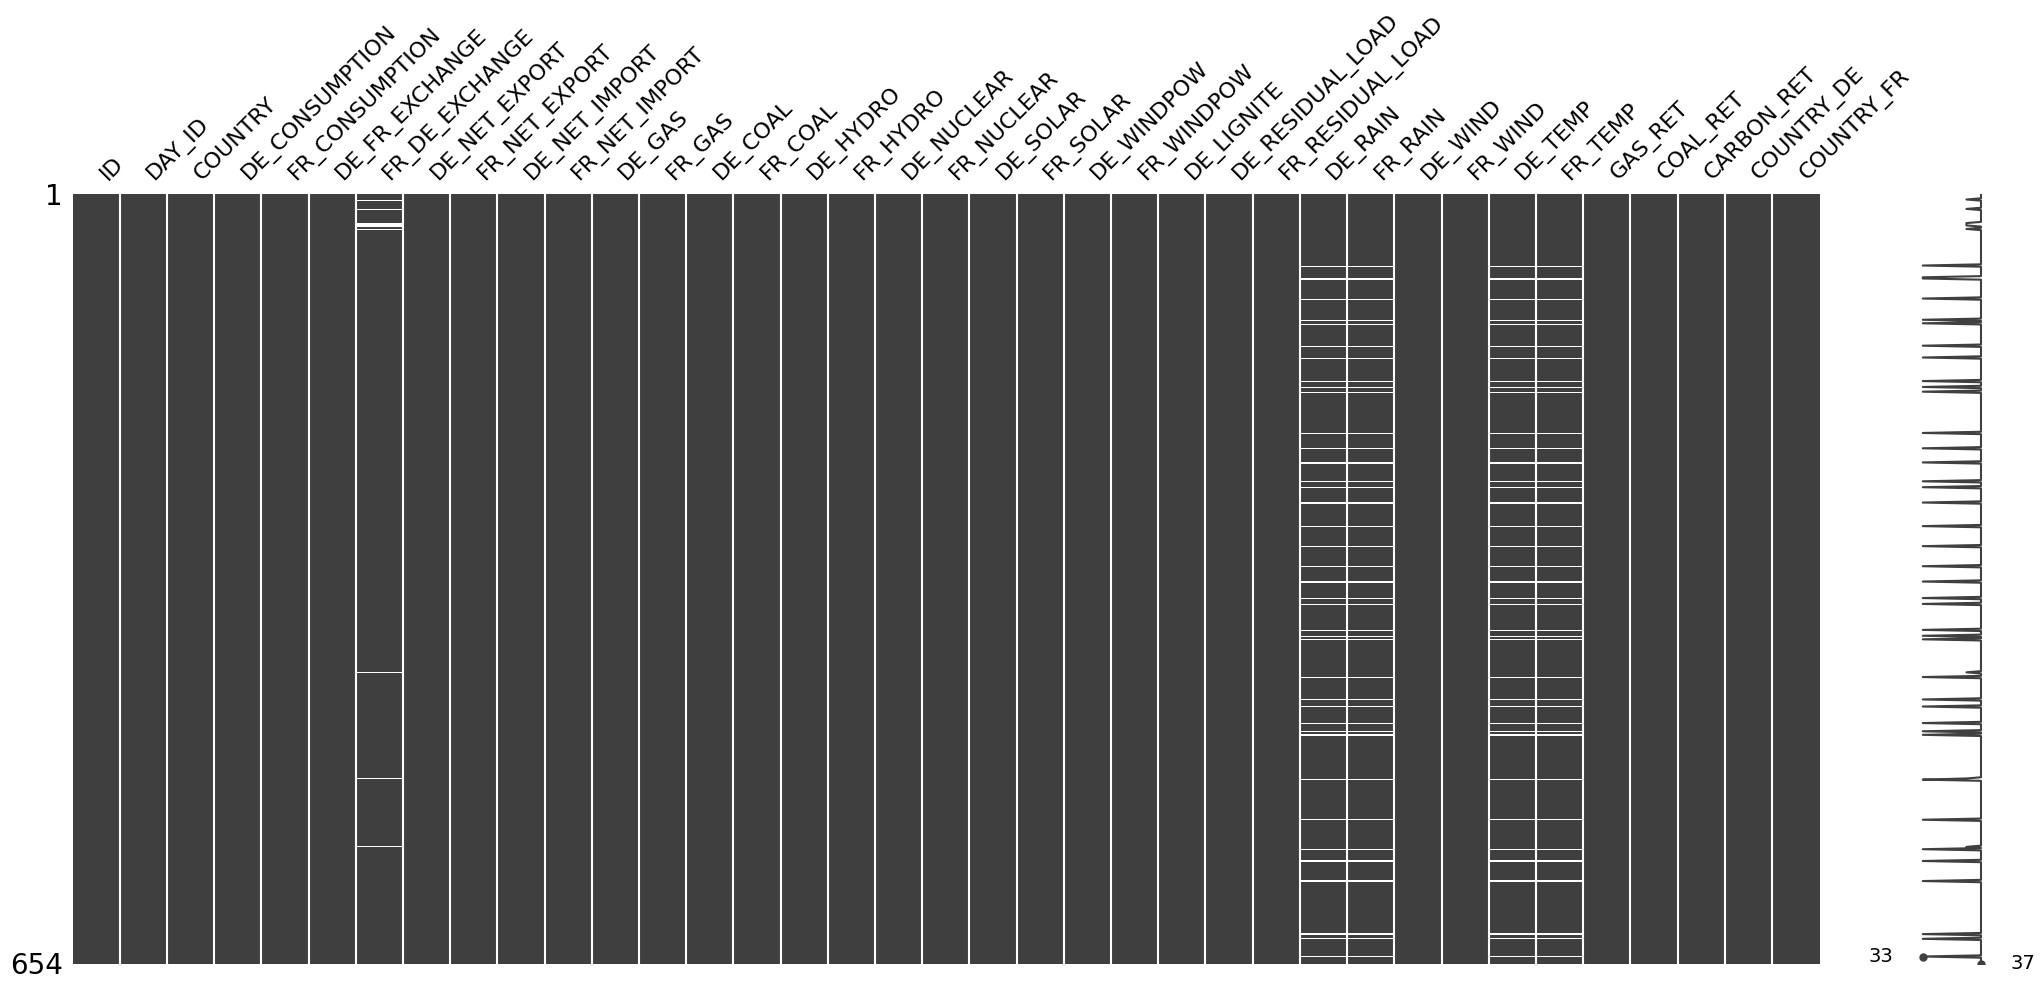

In [48]:
msno.matrix(X_test_filled)

## Final prediction

In [49]:
with open("model_rf.pkl", "wb") as file:
    pickle.dump(model_rf, file)

In [50]:
 if pd.isna(row['FR_WIND']):
        model = pickle.load(open("FR_WIND_model_xgboost.pkl", "rb"))
        cols_when_model_builds = model.get_booster().feature_names
        temporary = row[cols_when_model_builds]
        # Sélectionner les colonnes nécessaires pour la prédiction
        input_data = temporary.values.reshape(1, -1)
        # Faire la prédiction avec le modèle DE_WIND_model_xgboost
        predicted_value = FR_WIND_model_xgboost.predict(input_data)[0]
        # Remplacer la valeur manquante dans la copie du DataFrame
        X_test_filled.loc[index, 'FR_WIND'] = predicted_value

In [51]:
cols = cols = [
 'DE_CONSUMPTION',
 'FR_CONSUMPTION',
 'DE_FR_EXCHANGE',
 #'FR_DE_EXCHANGE',
 'DE_NET_EXPORT',
 'FR_NET_EXPORT',
 'DE_NET_IMPORT',
 'FR_NET_IMPORT',
 'DE_GAS',
 'FR_GAS',
 'DE_COAL',
 'FR_COAL',
 'DE_HYDRO',
 'FR_HYDRO',
 'DE_NUCLEAR',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'DE_LIGNITE',
 'DE_RESIDUAL_LOAD',
 'FR_RESIDUAL_LOAD',
 #'DE_RAIN',
 #'FR_RAIN',
 'DE_WIND',
 'FR_WIND',
 #'DE_TEMP',
 #'FR_TEMP',
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 #'TARGET',
 'COUNTRY_DE',
 'COUNTRY_FR']
prediction = model_rf.predict(X_test_filled[cols].values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [52]:
X_test_filled['TARGET'] = prediction

In [54]:
train = pd.read_csv('/content/ChallengeData_QubeRT/Datasets/Initial_Dataset/X_train_NHkHMNU.csv')
Y = pd.read_csv('/content/ChallengeData_QubeRT/Datasets/Initial_Dataset/y_train_ZAN5mwg.csv', usecols = [1])

TARGET = Y
train['TARGET'] = TARGET

train.to_csv('train.csv')



In [56]:
X_test_filled[['ID','TARGET']].to_csv('2311_submit.csv', index = False, sep =',')